In [1]:
#Importing the required libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Supressing Warnings 

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing the datasets of individual stocks 
amer_air = pd.read_csv("AAL.csv",index_col='Date')
alsk_air = pd.read_csv("ALK.csv",index_col='Date')
hwi_air = pd.read_csv("HA.csv",index_col='Date')
cred_sui = pd.read_csv("CS.csv",index_col='Date')
deut_bk = pd.read_csv("DB.csv",index_col='Date')
gld_schs = pd.read_csv("GS.csv",index_col='Date')
bsh_hc = pd.read_csv("BHC.csv",index_col='Date')
jnj = pd.read_csv("JNJ.csv",index_col='Date')
mrk = pd.read_csv("MRK.csv",index_col='Date')
apple = pd.read_csv("AAPL.csv",index_col='Date')
amazon = pd.read_csv("AMZN.csv",index_col='Date')
google = pd.read_csv("GOOG.csv",index_col='Date')
snp500 = pd.read_csv("S&P500.csv",index_col='Date')

In [4]:
amazon.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
01-10-2010  157.080002  157.440002  152.199997  153.710007  153.710007   
04-10-2010  153.949997  155.960007  152.789993  155.389999  155.389999   
05-10-2010  157.080002  161.210007  157.009995  160.869995  160.869995   
06-10-2010  160.600006  160.679993  154.600006  155.399994  155.399994   
07-10-2010  156.509995  157.399994  153.389999  156.270004  156.270004   

               Volume  
Date                   
01-10-2010  8683400.0  
04-10-2010  5346500.0  
05-10-2010  5620000.0  
06-10-2010  6060800.0  
07-10-2010  4622000.0

In [5]:
#Merging the all the datasets into a single dataset based on the column "Date" as it is common across all the stock datasets

datasets = [amer_air,alsk_air,hwi_air,cred_sui,deut_bk,gld_schs,bsh_hc,jnj,mrk,apple,amazon,google]

In [6]:
dfs = {'amer_air':amer_air, 'alsk_air':alsk_air, 'hwi_air':hwi_air, 'cred_sui':cred_sui, 'deut_bk':deut_bk, 
      'gld_schs': gld_schs, 'bsh_hc':bsh_hc, 'jnj':jnj, 'mrk':mrk, 'apple':apple, 'amazon':amazon, 'google':google}

In [7]:
import functools
from functools import reduce

In [8]:
dfs_tmp = {}
for stock, df in dfs.items():
    df.columns = pd.MultiIndex.from_product([[stock], df.columns])
    dfs_tmp[stock] = df
dfs = dfs_tmp
del dfs_tmp
stk_prc = reduce(
         lambda left, right: pd.merge(left, right, right_index=True, left_index=True), dfs.values())

In [9]:
stk_prc.shape

(2517, 72)

In [10]:
pd.set_option('display.max_columns',100)

In [11]:
stk_prc.describe()

amer_air                                                      \
              Open         High          Low        Close    Adj Close   
count  2517.000000  2517.000000  2517.000000  2517.000000  2517.000000   
mean     29.419932    29.893743    28.932447    29.397636    28.332638   
std      15.211082    15.368377    15.046234    15.211889    14.712407   
min       3.990000     4.060000     3.960000     4.000000     3.770966   
25%      12.970000    13.340000    12.630000    13.010000    12.560000   
50%      32.610001    33.299999    32.020000    32.520000    31.816221   
75%      42.169998    42.740002    41.599998    42.200001    40.423805   
max      58.790001    59.080002    57.799999    58.470001    56.988728   

                        alsk_air                                         \
             Volume         Open         High          Low        Close   
count  2.517000e+03  2517.000000  2517.000000  2517.000000  2517.000000   
mean   1.263146e+07    50.047186    50.697005    49.362837    50.031176   
std    2.149322e+07    24.189029    24.433428    23.940427    24.187020   
min    1.158400e+06    11.655000    11.882500    11.215000    11.620000   
25%    5.368800e+06    26.955000    27.865000    26.045000    26.780001   
50%    7.405700e+06    58.459999    59.060001    57.720001    58.540001   
75%    1.078520e+07    67.290001    68.000000    66.500000    67.260002   
max    4.286171e+08    99.910004   101.430000    98.040001   100.239998   

                                      hwi_air                            \
         Adj Close        Volume         Open         High          Low   
count  2517.000000  2.517000e+03  2517.000000  2517.000000  2517.000000   
mean     46.889544  1.648085e+06    22.884056    23.287282    22.475161   
std      23.293159  1.095121e+06    15.490954    15.723554    15.270538   
min      10.242908  2.706000e+05     3.730000     3.880000     3.670000   
25%      24.650858  1.087600e+06     7.020000     7.120000     6.890000   
50%      55.455898  1.399400e+06    21.910000    22.230000    21.280001   
75%      64.511078  1.880800e+06    37.049999    37.599998    36.330002   
max      94.471420  2.734710e+07    60.150002    60.900002    59.200001   

                                                  cred_sui               \
             Close    Adj Close        Volume         Open         High   
count  2517.000000  2517.000000  2.517000e+03  2517.000000  2517.000000   
mean     22.870413    22.182312  9.365502e+05    21.509947    21.669869   
std      15.483034    14.964163  6.485618e+05     8.993599     9.044728   
min       3.780000     3.642072  1.205000e+05     6.550000     6.860000   
25%       7.030000     6.773483  5.395000e+05    13.710000    13.850000   
50%      21.910000    21.120163  7.699000e+05    19.750000    19.850000   
75%      36.900002    35.708328  1.133000e+06    27.760000    27.920000   
max      60.299999    58.099716  1.258690e+07    46.083984    46.513672   

                                                                deut_bk  \
               Low        Close    Adj Close        Volume         Open   
count  2517.000000  2517.000000  2517.000000  2.517000e+03  2517.000000   
mean     21.327741    21.501379    17.507931  2.476788e+06    27.316815   
std       8.926825     8.988043     5.732890  1.847826e+06    15.417764   
min       6.470000     6.670000     6.552680  2.050000e+05     5.030000   
25%      13.630000    13.740000    12.715983  1.275300e+06    13.510000   
50%      19.340000    19.639999    16.708580  2.020700e+06    28.360001   
75%      27.558594    27.750000    21.744936  3.124000e+06    40.992367   
max      45.771484    46.513672    33.230030  1.776920e+07    62.767174   

                                                                         \
              High          Low        Close    Adj Close        Volume   
count  2517.000000  2517.000000  2517.000000  2517.000000  2.517000e+03   
mean     27.560722    27.031801    27.30

In [12]:
stk_prc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2517 entries, 01-02-2011 to 31-12-2019
Data columns (total 72 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (amer_air, Open)       2517 non-null   float64
 1   (amer_air, High)       2517 non-null   float64
 2   (amer_air, Low)        2517 non-null   float64
 3   (amer_air, Close)      2517 non-null   float64
 4   (amer_air, Adj Close)  2517 non-null   float64
 5   (amer_air, Volume)     2517 non-null   int64  
 6   (alsk_air, Open)       2517 non-null   float64
 7   (alsk_air, High)       2517 non-null   float64
 8   (alsk_air, Low)        2517 non-null   float64
 9   (alsk_air, Close)      2517 non-null   float64
 10  (alsk_air, Adj Close)  2517 non-null   float64
 11  (alsk_air, Volume)     2517 non-null   float64
 12  (hwi_air, Open)        2517 non-null   float64
 13  (hwi_air, High)        2517 non-null   float64
 14  (hwi_air, Low)         2517 non-null   float64

No missing values are found in the dataset. Thus no needs for data imputation

**1. Daily Returns - Daily return is calculated by subtracting the opening price from the closing price. Then,the result is to be divided by the opening price. Finally the result is to be multiplied by 100 to convert to a percentage.**

In [13]:
dct = {stk : (stk_prc[(stk, 'Close')] / stk_prc[(stk, 'Open')] - 1) * 100 
    for stk in stk_prc.columns.get_level_values(0)}
for stk, dailyReturns in dct.items():
    stk_prc.insert(stk_prc.columns.get_loc((stk, 'Volume')) + 1, (stk, 'Daily Returns'), dailyReturns)

In [14]:
stk_prc

amer_air                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
01-02-2011   9.970000  10.130000   9.910000   9.910000   9.342569   7210700   
01-02-2012   8.470000   8.950000   8.350000   8.900000   8.390399  10240100   
01-02-2013  14.430000  14.570000  14.020000  14.120000  13.311510   5308600   
01-02-2016  39.000000  39.939999  38.630001  39.380001  37.633320  12023500   
01-02-2017  44.750000  45.000000  43.910000  44.049999  42.566971   7955500   
...               ...        ...        ...        ...        ...       ...   
31-12-2013  24.740000  25.250000  24.629999  25.250000  23.804220   7166600   
31-12-2014  53.900002  54.639999  53.320000  53.630001  50.814617  10626000   
31-12-2015  42.540001  42.570000  41.830002  42.349998  40.471588   6813800   
31-12-2018  32.090000  32.619999  31.680000  32.110001  31.599045   5334700   
31-12-2019  28.200001  28.790001  28.190001  28.680000  28.574404   4396800   

                           alsk_air                                   \
           Daily Returns       Open       High        Low      Close   
Date                                                                   
01-02-2011     -0.601805  14.965000  15.635000  14.965000  15.562500   
01-02-2012      5.076741  19.120001  19.469999  19.007500  19.420000   
01-02-2013     -2.148302  23.155001  23.555000  23.135000  23.285000   
01-02-2016      0.974362  70.050003  70.940002  69.470001  70.290001   
01-02-2017     -1.564248  93.830002  94.680000  93.029999  93.629997   
...                  ...        ...        ...        ...        ...   
31-12-2013      2.061439  36.224998  36.775002  36.139999  36.685001   
31-12-2014     -0.500929  60.259998  60.939999  59.759998  59.759998   
31-12-2015     -0.446645  81.000000  81.449997  79.800003  80.510002   
31-12-2018      0.062328  60.540001  61.299999  60.029999  60.849998   
31-12-2019      1.702124  67.559998  68.160004  67.559998  67.750000   

                                                  hwi_air             \
            Adj Close     Volume Daily Returns       Open       High   
Date                                                                   
01-02-2011  13.718182  2141200.0      3.992650   7.450000   7.730000   
01-02-2012  17.118526  1704400.0      1.569032   6.500000   6.810000   
01-02-2013  20.525490  1484800.0      0.561429   5.750000   5.770000   
01-02-2016  64.792923  1443800.0      0.342610  35.389999  35.950001   
01-02-2017  87.695847   830200.0     -0.213157  51.099998  51.590000   
...               ...        ...           ...        ...        ...   
31-12-2013  32.718056  1161000.0      1.269850   9.460000   9.760000   
31-12-2014  54.468334   902400.0     -0.829738  26.469999  26.660000   
31-12-2015  74.213692   817500.0     -0.604936  36.279999  36.430000   
31-12-2018  59.208126  1564100.0      0.512053  26.100000  26.820000   
31-12-2019  67.367950   735300.0      0.281234  29.209999  29.570000   

                                                                      \
                  Low      Close  Adj Close     Volume Daily Returns   
Date                                                                   
01-02-2011   7.420000   7.630000   7.351589   447100.0      2.416107   
01-02-2012   5.870000   6.310000   6.079755  1989800.0     -2.923077   
01-02-2013   5.510000   5.580000   5.376392  1633400.0     -2.956522   
01-02-2016  34.910000  35.520000  34.223907  1397400.0      0.367338   
01-02-2017  50.220001  50.500000  48.657307   590000.0     -1.174164   
...               ...        ...        ...        ...           ...   
31-12-2013   9.460000   9.630000   9.278612  1069700.0      1.797040   
31-12-2014  25.920000  26.049999  25.099464  1549000.0     -1.586702   
31-12-2015  35.200001  35.330002  34.040848   923000.0     -2.618514   
31-12-2018  25.969999  2

**2.Max and Min Closing prices of Stocks**

In [15]:
min_prc = stk_prc.amer_air['Close'].min()
max_prc = stk_prc.amer_air['Close'].max()

results = pd.DataFrame({'Stock':['American Airlines'],'Minimum Price':[min_prc],'Maximum Price':[max_prc]})
results = results[['Stock','Minimum Price','Maximum Price']]
results

Stock  Minimum Price  Maximum Price
0  American Airlines            4.0      58.470001

In [16]:
min_prc = stk_prc.alsk_air['Close'].min()
max_prc = stk_prc.alsk_air['Close'].max()

min_prc1 = stk_prc.hwi_air['Close'].min()
max_prc1 = stk_prc.hwi_air['Close'].max()

min_prc2 = stk_prc.cred_sui['Close'].min()
max_prc2 = stk_prc.cred_sui['Close'].max()

min_prc3 = stk_prc.deut_bk['Close'].min()
max_prc3 = stk_prc.deut_bk['Close'].max()

min_prc4 = stk_prc.gld_schs['Close'].min()
max_prc4 = stk_prc.gld_schs['Close'].max()

min_prc5 = stk_prc.bsh_hc['Close'].min()
max_prc5 = stk_prc.bsh_hc['Close'].max()

min_prc6 = stk_prc.jnj['Close'].min()
max_prc6 = stk_prc.jnj['Close'].max()

min_prc7 = stk_prc.mrk['Close'].min()
max_prc7 = stk_prc.mrk['Close'].max()

min_prc8 = stk_prc.apple['Close'].min()
max_prc8 = stk_prc.apple['Close'].max()

min_prc9 = stk_prc.amazon['Close'].min()
max_prc9 = stk_prc.amazon['Close'].max()

min_prc10 = stk_prc.google['Close'].min()
max_prc10 = stk_prc.google['Close'].max()

tempResults1 = pd.DataFrame({'Stock':['Alaskan Airlines'],'Minimum Price':[min_prc],'Maximum Price':[max_prc]})
tempResults2 = pd.DataFrame({'Stock':['Hawaiian Airlines'],'Minimum Price':[min_prc1],'Maximum Price':[max_prc1]})
tempResults3 = pd.DataFrame({'Stock':['Credit Suisse'],'Minimum Price':[min_prc2],'Maximum Price':[max_prc2]})
tempResults4 = pd.DataFrame({'Stock':['Deutsche Bank'],'Minimum Price':[min_prc3],'Maximum Price':[max_prc3]})
tempResults5 = pd.DataFrame({'Stock':['Goldman Sachs'],'Minimum Price':[min_prc4],'Maximum Price':[max_prc4]})
tempResults6 = pd.DataFrame({'Stock':['Bausch HC'],'Minimum Price':[min_prc5],'Maximum Price':[max_prc5]})
tempResults7 = pd.DataFrame({'Stock':['Johnson n Johnson'],'Minimum Price':[min_prc6],'Maximum Price':[max_prc6]})
tempResults8 = pd.DataFrame({'Stock':['Marck'],'Minimum Price':[min_prc7],'Maximum Price':[max_prc7]})
tempResults9 = pd.DataFrame({'Stock':['Apple'],'Minimum Price':[min_prc8],'Maximum Price':[max_prc8]})
tempResults10 = pd.DataFrame({'Stock':['Amazon'],'Minimum Price':[min_prc9],'Maximum Price':[max_prc9]})
tempResults11 = pd.DataFrame({'Stock':['Google'],'Minimum Price':[min_prc10],'Maximum Price':[max_prc10]})


stk_minmax = pd.concat([results,tempResults1,tempResults2,tempResults3,tempResults4,tempResults5,tempResults6,tempResults7,tempResults8,tempResults9,tempResults10,tempResults11])
stk_minmax

Stock  Minimum Price  Maximum Price
0  American Airlines       4.000000      58.470001
0   Alaskan Airlines      11.620000     100.239998
0  Hawaiian Airlines       3.780000      60.299999
0      Credit Suisse       6.670000      46.513672
0      Deutsche Bank       5.480000      62.624046
0      Goldman Sachs      87.699997     273.380005
0          Bausch HC       8.510000     262.519989
0  Johnson n Johnson      57.660000     155.509995
0              Marck      29.809999      92.040001
0              Apple       9.951428     134.179993
0             Amazon     153.029999    3531.449951
0             Google     236.553345    1728.280029

**3.Calculating the Risk and Volatility of the Stocks**

Reading the S&P 500 Dataset as the same is to be used as market trend.

In [17]:
snp500 = pd.read_csv("S&P500.csv", index_col="Date")

In [18]:
snp500.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
01-10-2010  1143.489990  1150.300049  1139.420044  1146.239990  1146.239990   
04-10-2010  1144.959961  1148.160034  1131.869995  1137.030029  1137.030029   
05-10-2010  1140.680054  1162.760010  1140.680054  1160.750000  1160.750000   
06-10-2010  1159.810059  1162.329956  1154.849976  1159.969971  1159.969971   
07-10-2010  1161.569946  1163.869995  1151.410034  1158.060059  1158.060059   

                Volume  
Date                    
01-10-2010  4298910000  
04-10-2010  3604110000  
05-10-2010  4068840000  
06-10-2010  4073160000  
07-10-2010  3910550000

Calculating "Daily Returns" of S&P 500 

In [19]:
snp500['Daily Returns'] = ((snp500['Close'] / snp500['Open'])-1)*100

In [20]:
snp500.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
01-10-2010  1143.489990  1150.300049  1139.420044  1146.239990  1146.239990   
04-10-2010  1144.959961  1148.160034  1131.869995  1137.030029  1137.030029   
05-10-2010  1140.680054  1162.760010  1140.680054  1160.750000  1160.750000   
06-10-2010  1159.810059  1162.329956  1154.849976  1159.969971  1159.969971   
07-10-2010  1161.569946  1163.869995  1151.410034  1158.060059  1158.060059   

                Volume  Daily Returns  
Date                                   
01-10-2010  4298910000       0.240492  
04-10-2010  3604110000      -0.692595  
05-10-2010  4068840000       1.759472  
06-10-2010  4073160000       0.013788  
07-10-2010  3910550000      -0.302168

For the further Analysis, only the Closing prices of the stocks are required. Merging the individual datasets of the stocks with only the column "Close"

Before that found some Columns that lead to improper merging, so dropping those missing columns. 

In [21]:
amer_air.dropna(inplace=True)
alsk_air.dropna(inplace=True)
hwi_air.dropna(inplace=True)
cred_sui.dropna(inplace=True)
deut_bk.dropna(inplace=True)
gld_schs.dropna(inplace=True)
bsh_hc.dropna(inplace=True)
jnj.dropna(inplace=True)
mrk.dropna(inplace=True)
apple.dropna(inplace=True)
amazon.dropna(inplace=True)
google.dropna(inplace=True)

In [22]:
amer_air = amer_air.drop(['Open','High','Low','Adj Close','Volume'],axis=1,level=1)
alsk_air = alsk_air.drop(['Open','High','Low','Adj Close','Volume'],axis=1,level=1)
hwi_air = hwi_air.drop(['Open','High','Low','Adj Close','Volume'],axis=1,level=1)
cred_sui = cred_sui.drop(['Open','High','Low','Adj Close','Volume'],axis=1,level=1)
deut_bk = deut_bk.drop(['Open','High','Low','Adj Close','Volume'],axis=1,level=1)
gld_schs = gld_schs.drop(['Open','High','Low','Adj Close','Volume'],axis=1,level=1)
bsh_hc = bsh_hc.drop(['Open','High','Low','Adj Close','Volume'],axis=1,level=1)
jnj = jnj.drop(['Open','High','Low','Adj Close','Volume'],axis=1,level=1)
mrk = mrk.drop(['Open','High','Low','Adj Close','Volume'],axis=1,level=1)
apple = apple.drop(['Open','High','Low','Adj Close','Volume'],axis=1,level=1)
amazon = amazon.drop(['Open','High','Low','Adj Close','Volume'],axis=1,level=1)
google = google.drop(['Open','High','Low','Adj Close','Volume'],axis=1,level=1)

In [23]:
datasets = [amer_air,alsk_air,hwi_air,cred_sui,deut_bk,gld_schs,bsh_hc,jnj,mrk,apple,amazon,google]

In [24]:
stk_cls = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='outer'), datasets)

In [25]:
stk_cls = stk_cls.dropna()

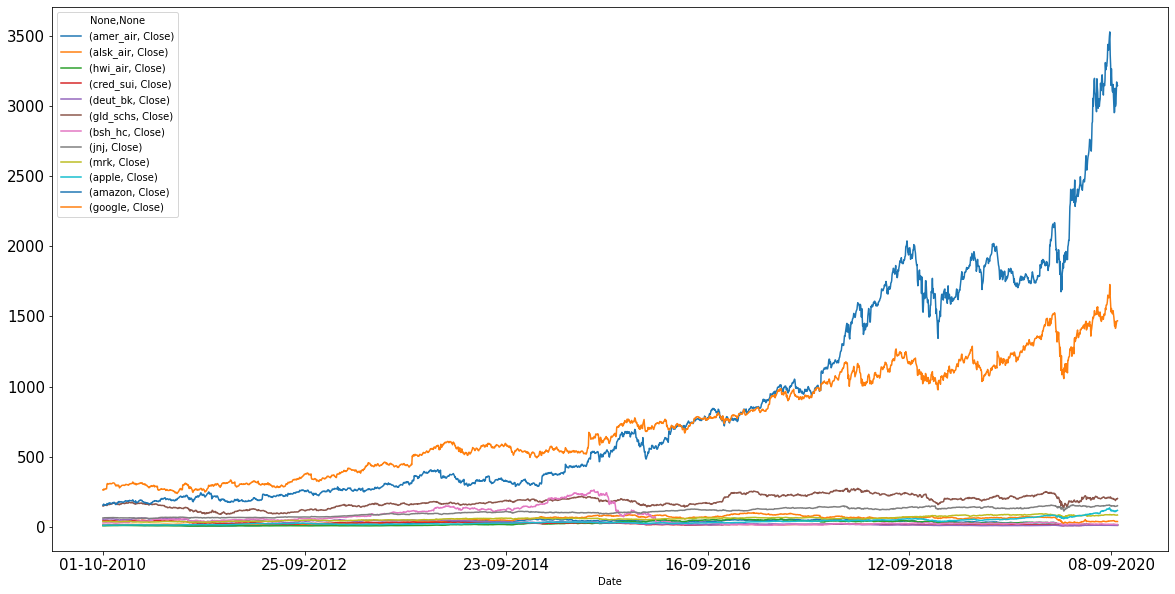

In [26]:
stk_cls.plot(figsize= (20,10), fontsize=15)
plt.style.use('classic')
plt.show()

**Standard deviation will tell us, how much is the deviation between historical figures of any given stock and mean value will tell us the average stock price for the duration.**

### Volatility

Volatility represents how large an asset's prices swing around the mean price—it is a statistical measure of its dispersion of returns. 

Volatility can be calculated using  Variance and Standard Deviation of the Stock

Since Volatility measure changes over a period, it can be calculated with Standard deviation and Square root of the trading days 


In [27]:
stk_sd = stk_cls.describe().T.loc[:,['mean', 'std']]

In [28]:
stk_sd

mean         std
amer_air Close   29.397636   15.211889
alsk_air Close   50.031176   24.187020
hwi_air  Close   22.870413   15.483034
cred_sui Close   21.501379    8.988043
deut_bk  Close   27.304930   15.409974
gld_schs Close  179.598184   42.405475
bsh_hc   Close   61.880687   57.170002
jnj      Close  105.277378   28.174233
mrk      Close   57.161053   15.164505
apple    Close   33.454670   20.630118
amazon   Close  854.636107  745.201139
google   Close  730.426139  364.685720

**Above table shows data for single day. So, we need to calculate it for entire year, which comes up to approximate 251 trading days.**

In [29]:
stk_sd['Mean'] = stk_sd['mean']*251
stk_sd['Standard Deviation / Volatility'] = stk_sd['std']*np.sqrt(251)

In [30]:
stk_sd

mean         std           Mean  \
amer_air Close   29.397636   15.211889    7378.806657   
alsk_air Close   50.031176   24.187020   12557.825189   
hwi_air  Close   22.870413   15.483034    5740.473709   
cred_sui Close   21.501379    8.988043    5396.846157   
deut_bk  Close   27.304930   15.409974    6853.537508   
gld_schs Close  179.598184   42.405475   45079.144293   
bsh_hc   Close   61.880687   57.170002   15532.052531   
jnj      Close  105.277378   28.174233   26424.621831   
mrk      Close   57.161053   15.164505   14347.424268   
apple    Close   33.454670   20.630118    8397.122224   
amazon   Close  854.636107  745.201139  214513.662800   
google   Close  730.426139  364.685720  183336.960946   

                Standard Deviation / Volatility  
amer_air Close                       241.001650  
alsk_air Close                       383.194456  
hwi_air  Close                       245.297395  
cred_sui Close                       142.397378  
deut_bk  Close                       244.139903  
gld_schs Close                       671.829069  
bsh_hc   Close                       905.743173  
jnj      Close                       446.363801  
mrk      Close                       240.250946  
apple    Close                       326.842540  
amazon   Close                     11806.206375  
google   Close                      5777.708389

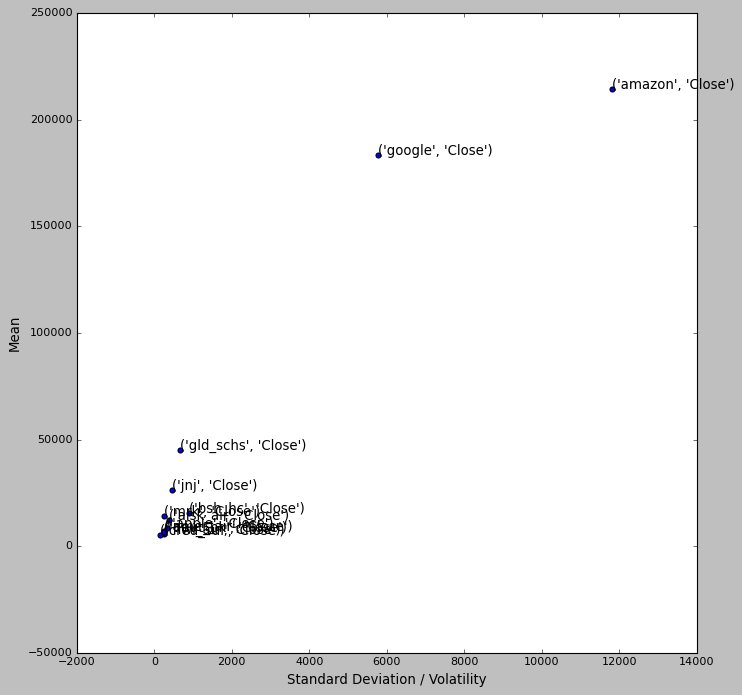

In [31]:
stk_sd.plot.scatter(figsize= (10,10), fontsize=10, x='Standard Deviation / Volatility',y='Mean')
for idx in stk_sd.index:
     plt.annotate(idx,xy=(stk_sd.loc[idx,'Standard Deviation / Volatility']+0.005,stk_sd.loc[idx,'Mean']+0.005))


By looking at Graph 1 and Graph 2, you can see that Amazon & Google are very high in terms of both standard deviation and mean, which means they are very volatile. **This volatility puts them into higher category price change(increase) compared to other stocks.**

**The stocks Goldman Sachs, Johnson&Johnson are moderately between Mean price and Std. deviation.**

Most other stocks of American Airlines, Alaskan Air, Hawaiian Air, Bausch, Mark, Apple, Credit Suisse and Deutsche bank have very low Mean closing price and Std.Deviation. **Thus these stocks are less volatile, 
Along with this, Graph 1 clearly displays the trend depicting the closing price in 2010 and the closing price in 2020. 



In [32]:
stk_cls.columns = stk_cls.columns.droplevel(level=1)

In [33]:
stk_cls.describe()

amer_air     alsk_air      hwi_air     cred_sui      deut_bk  \
count  2517.000000  2517.000000  2517.000000  2517.000000  2517.000000   
mean     29.397636    50.031176    22.870413    21.501379    27.304930   
std      15.211889    24.187020    15.483034     8.988043    15.409974   
min       4.000000    11.620000     3.780000     6.670000     5.480000   
25%      13.010000    26.780001     7.030000    13.740000    13.470000   
50%      32.520000    58.540001    21.910000    19.639999    28.370001   
75%      42.200001    67.260002    36.900002    27.750000    41.049618   
max      58.470001   100.239998    60.299999    46.513672    62.624046   

          gld_schs       bsh_hc          jnj          mrk        apple  \
count  2517.000000  2517.000000  2517.000000  2517.000000  2517.000000   
mean    179.598184    61.880687   105.277378    57.161053    33.454670   
std      42.405475    57.170002    28.174233    15.164505    20.630118   
min      87.699997     8.510000    57.660000    29.809999     9.951428   
25%     154.990005    22.170000    81.930000    45.730000    18.961428   
50%     177.229996    38.759998   104.040001    57.180000    27.592501   
75%     211.580002    90.269997   130.979996    64.089996    42.962502   
max     273.380005   262.519989   155.509995    92.040001   134.179993   

            amazon       google  
count  2517.000000  2517.000000  
mean    854.636107   730.426139  
std     745.201139   364.685720  
min     153.029999   236.553345  
25%     266.489990   403.642059  
50%     533.750000   651.789978  
75%    1500.000000  1055.810059  
max    3531.449951  1728.280029

In [34]:
stk_cls['AmerAir_dr%'] = stk_cls['amer_air'].pct_change()
stk_cls['AlskAir_dr%'] = stk_cls['alsk_air'].pct_change()
stk_cls['Hwi_dr%'] = stk_cls['hwi_air'].pct_change()
stk_cls['CrdSui_dr%'] = stk_cls['cred_sui'].pct_change()
stk_cls['DeuBk_dr%'] = stk_cls['deut_bk'].pct_change()
stk_cls['Gldschs_dr%'] = stk_cls['gld_schs'].pct_change()
stk_cls['Bshhc_dr%'] = stk_cls['bsh_hc'].pct_change()
stk_cls['Jnj_dr%'] = stk_cls['jnj'].pct_change()
stk_cls['Mrk_dr%'] = stk_cls['mrk'].pct_change()
stk_cls['Apple_dr%'] = stk_cls['apple'].pct_change()
stk_cls['Amazon_dr%'] = stk_cls['amazon'].pct_change()
stk_cls['Google_dr%'] = stk_cls['google'].pct_change()

In [35]:
stk_sd1 = stk_sd.transpose()
stk_sd1.columns= stk_sd1.columns.droplevel(level=1)

In [36]:
stk_sd1 = stk_sd1.drop(['mean','std','Mean'])

In [37]:
stk_sd1

amer_air    alsk_air     hwi_air  \
Standard Deviation / Volatility  241.00165  383.194456  245.297395   

                                   cred_sui     deut_bk    gld_schs  \
Standard Deviation / Volatility  142.397378  244.139903  671.829069   

                                     bsh_hc         jnj         mrk  \
Standard Deviation / Volatility  905.743173  446.363801  240.250946   

                                     apple        amazon       google  
Standard Deviation / Volatility  326.84254  11806.206375  5777.708389

### Correlation of the Stocks  

**Correlation measures association between Stocks but doesn't show if Stock-A affects Stock-B or vice versa**

**It is a statistic method that measures the degree to which the variables (here the stocks) move in relation to each other** 

**It is used to measure the movement of a stock with that of a Benchmark index (S & P 500)**



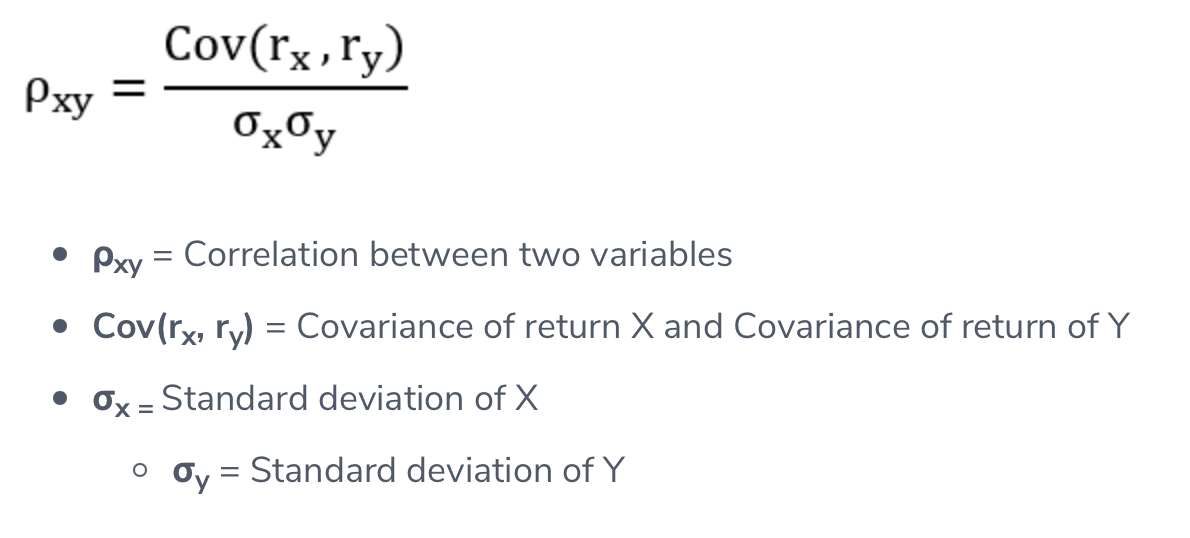

In [38]:
stk_cls_prc = stk_cls.drop(['AmerAir_dr%','AlskAir_dr%','Hwi_dr%','CrdSui_dr%','DeuBk_dr%','Gldschs_dr%','Bshhc_dr%','Jnj_dr%','Mrk_dr%','Apple_dr%','Amazon_dr%','Google_dr%'],axis=1)

In [39]:
log_returns = np.log(stk_cls_prc/stk_cls_prc.shift())

In [40]:
correlation = log_returns.corr()

In [41]:
correlation

amer_air  alsk_air   hwi_air  cred_sui   deut_bk  gld_schs  \
amer_air  1.000000  0.690153  0.615953  0.358032  0.381775  0.451730   
alsk_air  0.690153  1.000000  0.642153  0.429350  0.415446  0.503462   
hwi_air   0.615953  0.642153  1.000000  0.348130  0.349196  0.430518   
cred_sui  0.358032  0.429350  0.348130  1.000000  0.783422  0.680217   
deut_bk   0.381775  0.415446  0.349196  0.783422  1.000000  0.665321   
gld_schs  0.451730  0.503462  0.430518  0.680217  0.665321  1.000000   
bsh_hc    0.227518  0.277092  0.194229  0.316332  0.280534  0.318958   
jnj       0.236829  0.305490  0.243622  0.371544  0.341511  0.451643   
mrk       0.234479  0.309785  0.240248  0.390561  0.361402  0.432300   
apple     0.270674  0.326549  0.261717  0.366830  0.351231  0.457032   
amazon    0.221166  0.273184  0.195393  0.291181  0.312153  0.361119   
google    0.271095  0.358434  0.262829  0.418150  0.399537  0.492519   

            bsh_hc       jnj       mrk     apple    amazon    google  
amer_air  0.227518  0.236829  0.234479  0.270674  0.221166  0.271095  
alsk_air  0.277092  0.305490  0.309785  0.326549  0.273184  0.358434  
hwi_air   0.194229  0.243622  0.240248  0.261717  0.195393  0.262829  
cred_sui  0.316332  0.371544  0.390561  0.366830  0.291181  0.418150  
deut_bk   0.280534  0.341511  0.361402  0.351231  0.312153  0.399537  
gld_schs  0.318958  0.451643  0.432300  0.457032  0.361119  0.492519  
bsh_hc    1.000000  0.237783  0.294608  0.228995  0.197185  0.262125  
jnj       0.237783  1.000000  0.578245  0.370633  0.323490  0.415275  
mrk       0.294608  0.578245  1.000000  0.330201  0.274052  0.369025  
apple     0.228995  0.370633  0.330201  1.000000  0.435618  0.529425  
amazon    0.197185  0.323490  0.274052  0.435618  1.000000  0.578316  
google    0.262125  0.415275  0.369025  0.529425  0.578316  1.000000

**Visualisation of the Correlation between the stocks within their Industry groups**

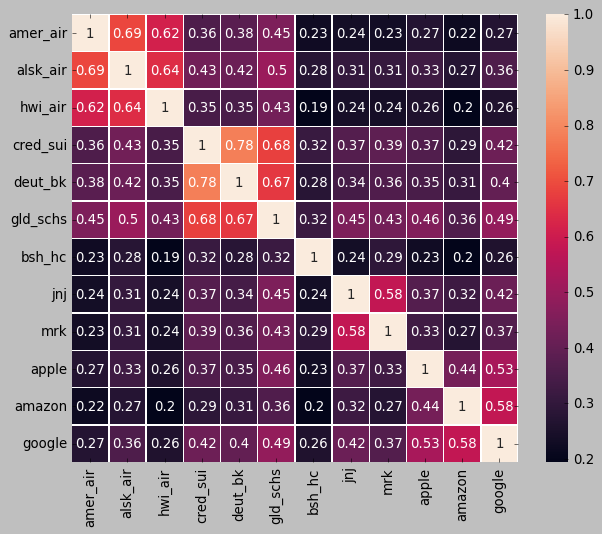

In [42]:
f, ax = plt.subplots(figsize=(9,7))
sns.heatmap(log_returns.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

From the above representation of Correlation among stocks using Heatmap, the following can be inferred. 

**High Positive Correlation among the Aviation Industry stocks**

**Again high Positive Correlation among the Finance Industry stocks such as Credit Suisse, Deutsche Bank and Goldman Sachs**

**Low Positive Correlation among the Pharma and Healthcare industry stocks**

**Medium Postive Correlation among the Technology company stocks such as Apple, Amazon and Google**

### Checking Coorelation between the stocks and the Market Index S&P 500

In [43]:
snp500_cls = snp500['Close']

In [44]:
snp_lg_returns = pd.DataFrame(np.log(snp500_cls/snp500_cls.shift()))

In [45]:
stks_snp500 = pd.concat([stk_cls_prc,snp500_cls],axis=1)

In [46]:
stks_snp500_lr = np.log(stks_snp500/stks_snp500.shift())

In [47]:
stks_snp500_lr.corr()

amer_air  alsk_air   hwi_air  cred_sui   deut_bk  gld_schs  \
amer_air  1.000000  0.690153  0.615953  0.358032  0.381775  0.451730   
alsk_air  0.690153  1.000000  0.642153  0.429350  0.415446  0.503462   
hwi_air   0.615953  0.642153  1.000000  0.348130  0.349196  0.430518   
cred_sui  0.358032  0.429350  0.348130  1.000000  0.783422  0.680217   
deut_bk   0.381775  0.415446  0.349196  0.783422  1.000000  0.665321   
gld_schs  0.451730  0.503462  0.430518  0.680217  0.665321  1.000000   
bsh_hc    0.227518  0.277092  0.194229  0.316332  0.280534  0.318958   
jnj       0.236829  0.305490  0.243622  0.371544  0.341511  0.451643   
mrk       0.234479  0.309785  0.240248  0.390561  0.361402  0.432300   
apple     0.270674  0.326549  0.261717  0.366830  0.351231  0.457032   
amazon    0.221166  0.273184  0.195393  0.291181  0.312153  0.361119   
google    0.271095  0.358434  0.262829  0.418150  0.399537  0.492519   
Close     0.457884  0.575300  0.450667  0.677543  0.641033  0.778442   

            bsh_hc       jnj       mrk     apple    amazon    google     Close  
amer_air  0.227518  0.236829  0.234479  0.270674  0.221166  0.271095  0.457884  
alsk_air  0.277092  0.305490  0.309785  0.326549  0.273184  0.358434  0.575300  
hwi_air   0.194229  0.243622  0.240248  0.261717  0.195393  0.262829  0.450667  
cred_sui  0.316332  0.371544  0.390561  0.366830  0.291181  0.418150  0.677543  
deut_bk   0.280534  0.341511  0.361402  0.351231  0.312153  0.399537  0.641033  
gld_schs  0.318958  0.451643  0.432300  0.457032  0.361119  0.492519  0.778442  
bsh_hc    1.000000  0.237783  0.294608  0.228995  0.197185  0.262125  0.395360  
jnj       0.237783  1.000000  0.578245  0.370633  0.323490  0.415275  0.664365  
mrk       0.294608  0.578245  1.000000  0.330201  0.274052  0.369025  0.616211  
apple     0.228995  0.370633  0.330201  1.000000  0.435618  0.529425  0.656828  
amazon    0.197185  0.323490  0.274052  0.435618  1.000000  0.578316  0.551575  
google    0.262125  0.415275  0.369025  0.529425  0.578316  1.000000  0.685392  
Close     0.395360  0.664365  0.616211  0.656828  0.551575  0.685392  1.000000

**Visualisation of the Correlation between the stocks and the Market Index S&P 500**

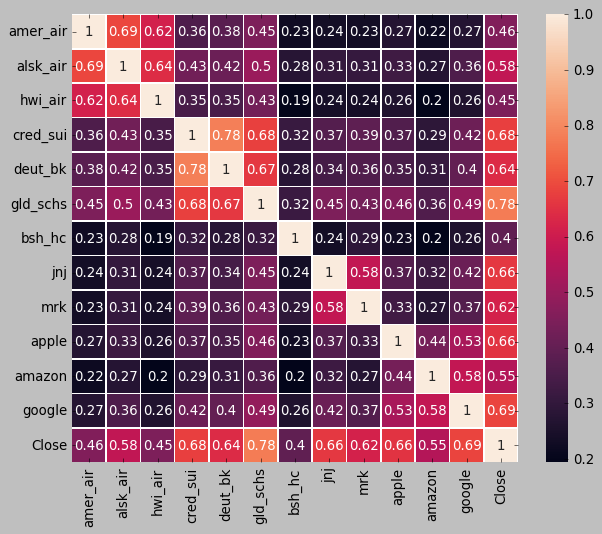

In [48]:
f, ax = plt.subplots(figsize=(9,7))
sns.heatmap(stks_snp500_lr.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

**Stocks such as Goldman Sachs, Google, Credit Suisse, Johnson&Johnson, Apple and Deutsche Bank have a High Positive Correlation with the Market Index**

**Other stocks have a moderate Positive Correlation with the market index**

**It is to be clearly noted that all the stocks that are being analysed have a positive correlation with the Market Index, thus it can be safely said that these Stocks move in relation with S&P 500**

**Visualising the Stock Prices**

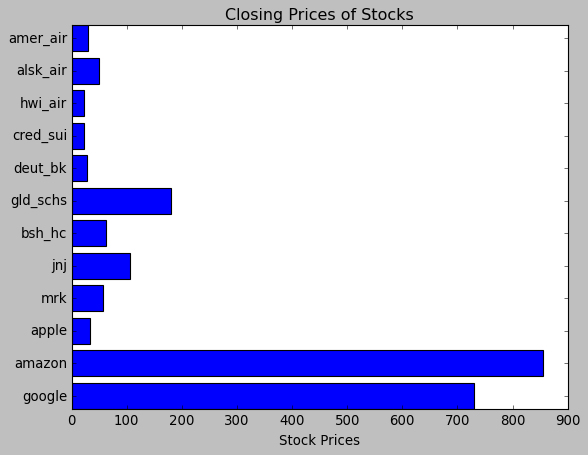

In [49]:
fig, ax = plt.subplots()
ax.barh(stk_cls_prc.columns,stk_cls_prc.mean() , align='center')
ax.set_yticks(stk_cls_prc.columns)
ax.invert_yaxis()  
ax.set_xlabel('Stock Prices')
ax.set_title('Closing Prices of Stocks')

plt.show()

**Normalizing the Stock Prices**

**As the Stock Prices are in different Scales, they are being Normalized**

In [50]:
norm = stk_cls_prc/stk_cls_prc.iloc[0]

In [51]:
norm

amer_air  alsk_air   hwi_air  cred_sui   deut_bk  gld_schs  \
Date                                                                     
01-10-2010  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
04-10-2010  0.981701  0.975497  0.964765  0.992599  0.984035  0.992349   
05-10-2010  0.993541  0.981322  0.981544  1.021970  1.025762  1.012661   
06-10-2010  0.993541  0.979112  1.001678  1.028677  1.038280  1.021259   
07-10-2010  0.994618  0.933922  1.031879  1.034228  1.027395  1.023087   
...              ...       ...       ...       ...       ...       ...   
24-09-2020  1.266954  2.868046  2.080537  0.227819  0.154196  1.320989   
25-09-2020  1.322928  2.948383  2.147651  0.224503  0.152104  1.319905   
28-09-2020  1.373520  3.015867  2.244966  0.234450  0.160280  1.347800   
29-09-2020  1.318622  2.945973  2.157718  0.232792  0.157238  1.332363   
30-09-2020  1.322928  2.942760  2.162752  0.236107  0.159710  1.360664   

              bsh_hc       jnj       mrk      apple     amazon    google  
Date                                                                      
01-10-2010  1.000000  1.000000  1.000000   1.000000   1.000000  1.000000  
04-10-2010  1.004660  0.998704  0.997814   0.986266   1.010930  0.993779  
05-10-2010  1.021359  1.017004  1.011475   1.022724   1.046581  1.023991  
06-10-2010  1.036505  1.023644  1.011202   1.023609   1.010995  1.016609  
07-10-2010  1.033010  1.023806  1.003005   1.023715   1.016655  1.008352  
...              ...       ...       ...        ...        ...       ...  
24-09-2020  0.591068  2.342834  2.271858  10.725471  19.646021  5.455057  
25-09-2020  0.594175  2.358866  2.265847  11.127849  20.136164  5.518724  
28-09-2020  0.593010  2.382348  2.261202  11.393459  20.649599  5.593430  
29-09-2020  0.577864  2.381538  2.237705  11.307234  20.459825  5.611801  
30-09-2020  0.603495  2.411012  2.266393  11.477700  20.484873  5.612832  

[2517 rows x 12 columns]

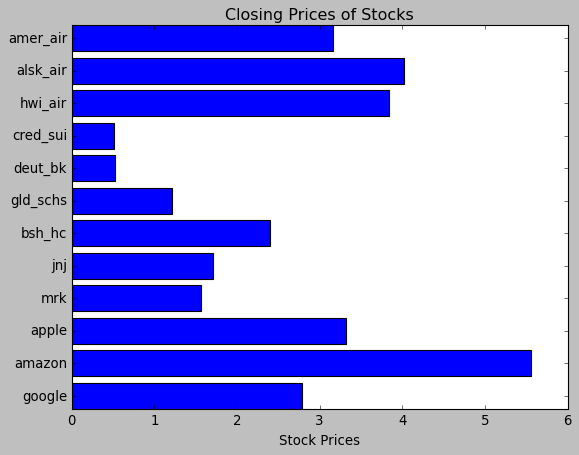

In [52]:
fig, ax = plt.subplots()
ax.barh(norm.columns,norm.mean() , align='center')
ax.set_yticks(stk_cls_prc.columns)
ax.invert_yaxis()  
ax.set_xlabel('Stock Prices')
ax.set_title('Closing Prices of Stocks')

plt.show()

## Capital Asset Pricing Model (CAPM)

1. The capital asset pricing model (CAPM) describes the relationship between the systematic risk and the expected return for assets and is mainly used for stocks.

2. CAPM tries to capture this investment risk and the amount of return that an investor should expect on the investment. 

 

### Beta Value of a Stock

Beta is a measure of a stock's volatility in relation to the overall market. By definition, the market, such as the S&P 500 Index, has a beta of 1.0, and individual stocks are ranked according to how much they deviate from the market.

A stock that swings more than the market over time has a beta above 1.0. If a stock moves less than the market, the stock's beta is less than 1.0. High-beta stocks are supposed to be riskier but provide higher return potential; low-beta stocks pose less risk but also lower returns.

**Beta is a component of the Capital Asset Pricing Model, which calculates the cost of equity funding and can help determine the rate of return to expect relative to perceived risk.**

Beta = Covariance / Variance 

In [53]:
Covariance = stks_snp500_lr.cov()

In [54]:
Covariance

amer_air  alsk_air   hwi_air  cred_sui   deut_bk  gld_schs  \
amer_air  0.001045  0.000530  0.000605  0.000259  0.000326  0.000268   
alsk_air  0.000530  0.000565  0.000464  0.000228  0.000260  0.000220   
hwi_air   0.000605  0.000464  0.000924  0.000237  0.000280  0.000240   
cred_sui  0.000259  0.000228  0.000237  0.000500  0.000462  0.000279   
deut_bk   0.000326  0.000260  0.000280  0.000462  0.000696  0.000322   
gld_schs  0.000268  0.000220  0.000240  0.000279  0.000322  0.000337   
bsh_hc    0.000273  0.000244  0.000219  0.000262  0.000274  0.000217   
jnj       0.000083  0.000079  0.000080  0.000090  0.000098  0.000090   
mrk       0.000099  0.000096  0.000095  0.000114  0.000124  0.000103   
apple     0.000155  0.000138  0.000141  0.000146  0.000164  0.000149   
amazon    0.000142  0.000129  0.000118  0.000129  0.000163  0.000131   
google    0.000142  0.000138  0.000129  0.000152  0.000171  0.000146   
Close     0.000163  0.000150  0.000150  0.000166  0.000186  0.000157   

            bsh_hc       jnj       mrk     apple    amazon    google     Close  
amer_air  0.000273  0.000083  0.000099  0.000155  0.000142  0.000142  0.000163  
alsk_air  0.000244  0.000079  0.000096  0.000138  0.000129  0.000138  0.000150  
hwi_air   0.000219  0.000080  0.000095  0.000141  0.000118  0.000129  0.000150  
cred_sui  0.000262  0.000090  0.000114  0.000146  0.000129  0.000152  0.000166  
deut_bk   0.000274  0.000098  0.000124  0.000164  0.000163  0.000171  0.000186  
gld_schs  0.000217  0.000090  0.000103  0.000149  0.000131  0.000146  0.000157  
bsh_hc    0.001373  0.000096  0.000142  0.000151  0.000145  0.000157  0.000161  
jnj       0.000096  0.000118  0.000082  0.000071  0.000070  0.000073  0.000079  
mrk       0.000142  0.000082  0.000170  0.000076  0.000071  0.000078  0.000088  
apple     0.000151  0.000071  0.000076  0.000315  0.000153  0.000152  0.000128  
amazon    0.000145  0.000070  0.000071  0.000153  0.000393  0.000186  0.000120  
google    0.000157  0.000073  0.000078  0.000152  0.000186  0.000263  0.000122  
Close     0.000161  0.000079  0.000088  0.000128  0.000120  0.000122  0.000121

In [55]:
Variance = (snp_lg_returns.var())
print(Variance)

Close    0.000121
dtype: float64


In [56]:
Beta = Covariance / Variance

In [57]:
Beta.drop(Beta.columns[1:13],axis=1,inplace=True)

In [167]:
Beta

Close
amer_air  1.348402
alsk_air  1.245418
hwi_air   1.247685
cred_sui  1.380244
deut_bk   1.540307
gld_schs  1.301164
bsh_hc    1.334568
jnj       0.657456
mrk       0.731885
apple     1.061613
amazon    0.995492
google    1.011770
Close     1.000000

From the Beta values that are calculated above it can be inferred that the stocks, American Airlines, Alaskan Airlines, Hawaiian Air, Credit Suisse, Deutsche Bank, Goldman Sachs, Bausch Health Care have a higher volality than that of the Market Index. 

Johnson&Johnson, Mark Healthcare, Google and Amazon have an moderate Volatility 

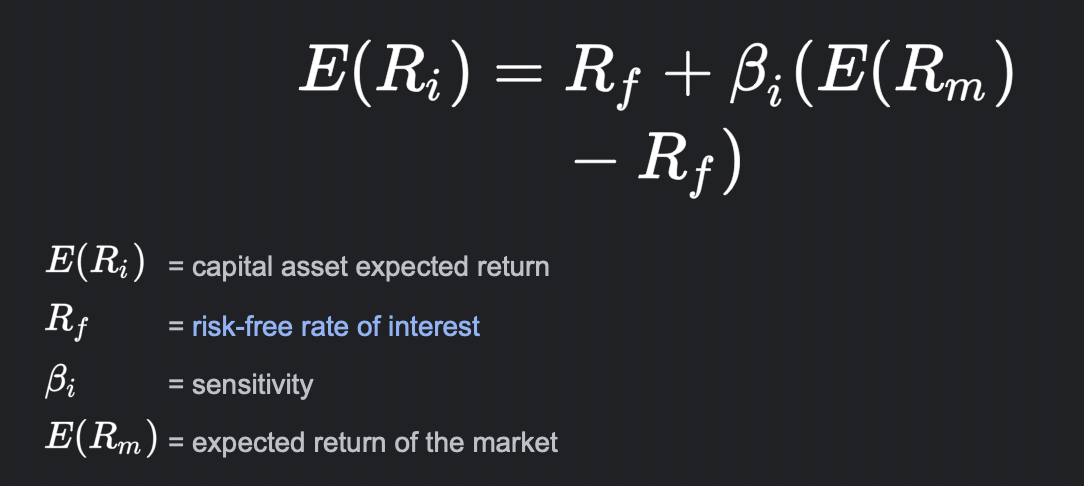

Risk-free Return of Interest from the **US Treasury Bonds** is about **0.75% for a 10 year period**. It can be inferred that, when funds are invested on the Bonds there will be a safe but low return. 


The Market Return % i.e., the **returns of S&P 500 since 2010 is 14.7%** beating the long-term historic average of 10.7% since the benchmark index was introduced 65 years ago.

In [59]:
Risk_free_returns = 0.0075
Market_returns = 0.147

In [60]:
Expected_Return = pd.DataFrame(Risk_free_returns + (Beta['Close']*(Market_returns - Risk_free_returns))*100)

In [61]:
Expected_Return 

Close
amer_air  18.817709
alsk_air  17.381078
hwi_air   17.412699
cred_sui  19.261898
deut_bk   21.494786
gld_schs  18.158734
bsh_hc    18.624721
jnj        9.179007
mrk       10.217297
apple     14.816995
amazon    13.894612
google    14.121698
Close     13.957500

In [62]:
amer_air.columns = amer_air.columns.droplevel(level=1)
alsk_air.columns = alsk_air.columns.droplevel(level=1)
hwi_air.columns = hwi_air.columns.droplevel(level=1)
cred_sui.columns = cred_sui.columns.droplevel(level=1)
deut_bk.columns = deut_bk.columns.droplevel(level=1)
gld_schs.columns = gld_schs.columns.droplevel(level=1)
bsh_hc.columns = bsh_hc.columns.droplevel(level=1)
jnj.columns = jnj.columns.droplevel(level=1)
mrk.columns = mrk.columns.droplevel(level=1)
apple.columns = apple.columns.droplevel(level=1)
amazon.columns = amazon.columns.droplevel(level=1)
google.columns = google.columns.droplevel(level=1)

## Time Series Analysis

To predict the future prices of the stocks the Auto Regressive Integrated Moving Average (ARIMA) method will be used. 

Despite the volatility, stock prices aren’t just randomly generated numbers. So, they can be analyzed as a sequence of discrete-time data; in other words, time-series observations taken at successive points in time (usually on a daily basis). Time series forecasting (predicting future values based on historical values) applies well to stock forecasting.

Because of the sequential nature of time-series data, we need a way to aggregate this sequence of information. 

Time Series Analysis comes very handy in predicting the Stock prices for a short term. 

For the Auto Regressive models, to predict the following assumptions are made. 

**1.Stationarity - If a time series is said to be stationary, then the Statistical properties such as mean, variance and Covariance are constant throughout the series. To test the same, ADFF test will be used.**

To convert the time series to a stationary one, the series is subjected to log transformation. And removal of Season and Trend is done by Seasonal decomposition. After decomposition the series becomes Stationary. 

**2.Autocorrelation - It is an assumption that a variable at a timestamp t, is correlated with its own lagged values. The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) is used to find the p and q value. The d- value is the order of differencing that is done to make original time series Stationary.**

In order to determine the p,d and q values instead of using ACF and PACF plotting, AutoARIMA method is  used. 



### Evaluation metrics and helper functions 

Since stock prices prediction is essentially a regression problem, the RMSE (Root Mean Squared Error) and MAPE (Mean Absolute Percentage Error %) will be our current model evaluation metrics. Both are useful measures of forecast accuracy. 

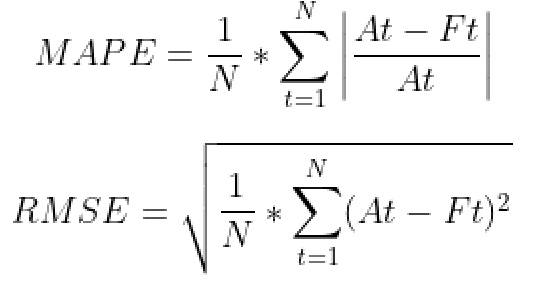

Splitting the Dataset of each Stock into Training and Test Sets. 70% of them will be used as Training Set and remaining shall be used as Test Set. 

All the 12 datasets with the Stock prices have the length of 2517 rows.

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

**ADF (Augmented Dickey-Fuller) Test**

The Dickey-Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test is:

**Null Hypothesis: The series has a unit root (value of a =1)**

**Alternate Hypothesis: The series has no unit root.**

If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary.

#### AAL - American Airlines 

In [64]:
df1 = pd.read_csv('AAL.csv',index_col='Date')
df1.dropna()
df1_close = df1['Close']

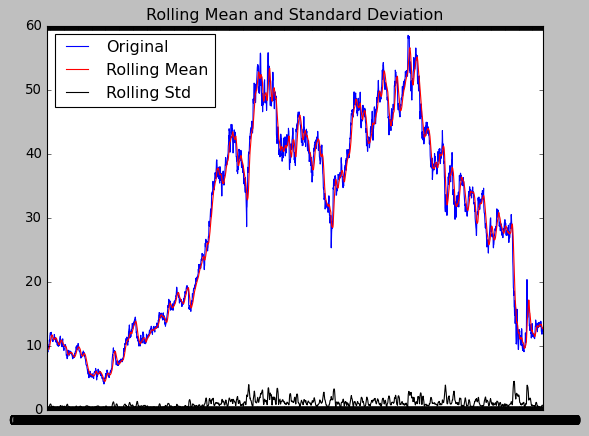

Results of dickey fuller test
Test Statistics                  -1.477736
p-value                           0.544495
No. of lags used                  1.000000
Number of observations used    2515.000000
critical value (1%)              -3.432953
critical value (5%)              -2.862690
critical value (10%)             -2.567382
dtype: float64


In [65]:
def test_stationarity(timeseries):
 
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
  
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
  
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df1_close)

Separating Trend, Seasonality and the Residues using Multiplicative method

<Figure size 640x480 with 0 Axes>

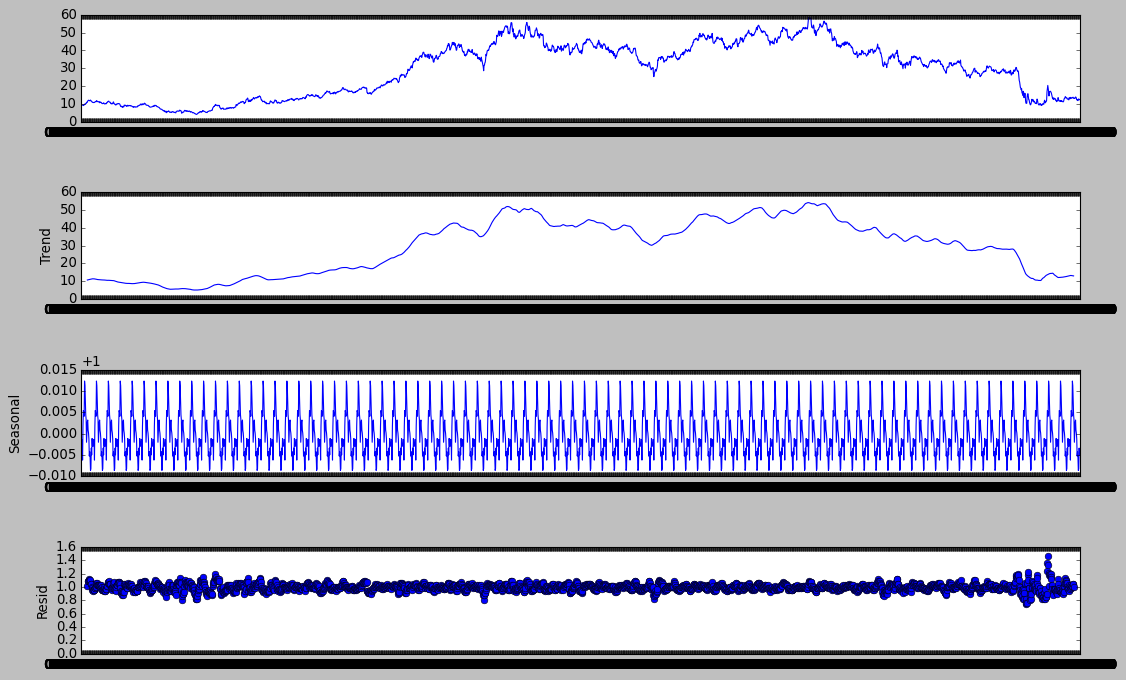

In [66]:
result = seasonal_decompose(amer_air, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [67]:
df1_log = np.log(df1_close)

In [68]:
#split data into train and training set
train_data1, test_data1 = df1_log[3:int(len(df1_log)*0.7)], df1_log[int(len(df1_log)*0.7):]

In [69]:
model_autoARIMA = auto_arima(train_data1, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7553.801, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7552.533, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7552.525, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7553.877, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7551.472, Time=0.42 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.364 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1758
Model:               SARIMAX(0, 1, 0)   Log Likelihood                3777.938
Date:                Mon, 15 Aug 2022   AIC                          -7553.877
Time:                        19:28:24   BIC                          -7548.406
Sample:                             0   HQIC                         -7551.855
                               - 1758                                  

In [70]:
model = ARIMA(train_data1, order=(0, 1, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1757
Model:                 ARIMA(0, 1, 0)   Log Likelihood                3778.901
Method:                           css   S.D. of innovations              0.028
Date:                Mon, 15 Aug 2022   AIC                          -7553.801
Time:                        19:28:24   BIC                          -7542.859
Sample:                             1   HQIC                         -7549.757
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.001      1.388      0.165      -0.000       0.002


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

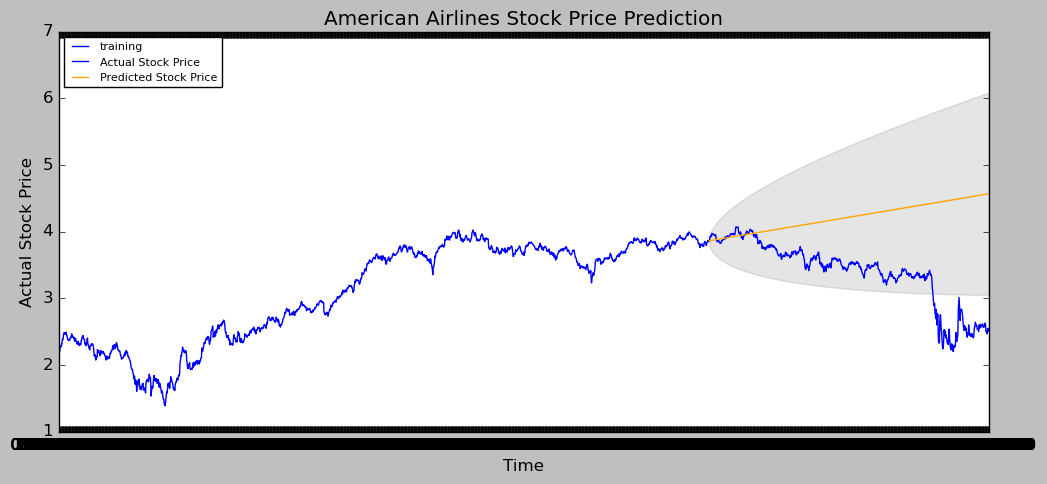

In [71]:
# Forecast
fc, se, conf = fitted.forecast(756, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data1.index)
lower_series = pd.Series(conf[:, 0], index=test_data1.index)
upper_series = pd.Series(conf[:, 1], index=test_data1.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data1, label='training')
plt.plot(test_data1, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('American Airlines Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [72]:
rmse = math.sqrt(mean_squared_error(test_data1, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data1)/np.abs(test_data1))
print('MAPE: '+str(mape))

RMSE: 1.0641093183346522
MAPE: 0.2858913765659353


#### Alaskan Airlines - ALK 

In [73]:
df2 = pd.read_csv('ALK.csv',index_col='Date')
df2.dropna()
df2_close = df2['Close']
df2_close = df2_close.dropna()

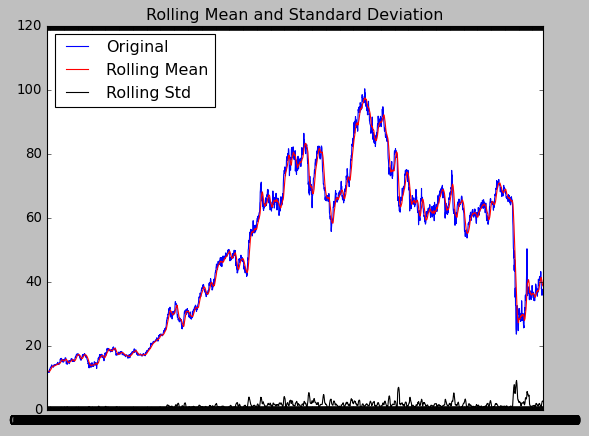

Results of dickey fuller test
Test Statistics                  -1.615373
p-value                           0.475156
No. of lags used                  1.000000
Number of observations used    2515.000000
critical value (1%)              -3.432953
critical value (5%)              -2.862690
critical value (10%)             -2.567382
dtype: float64


In [74]:
def test_stationarity(timeseries):
 
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
  
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
  
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df2_close)

<Figure size 640x480 with 0 Axes>

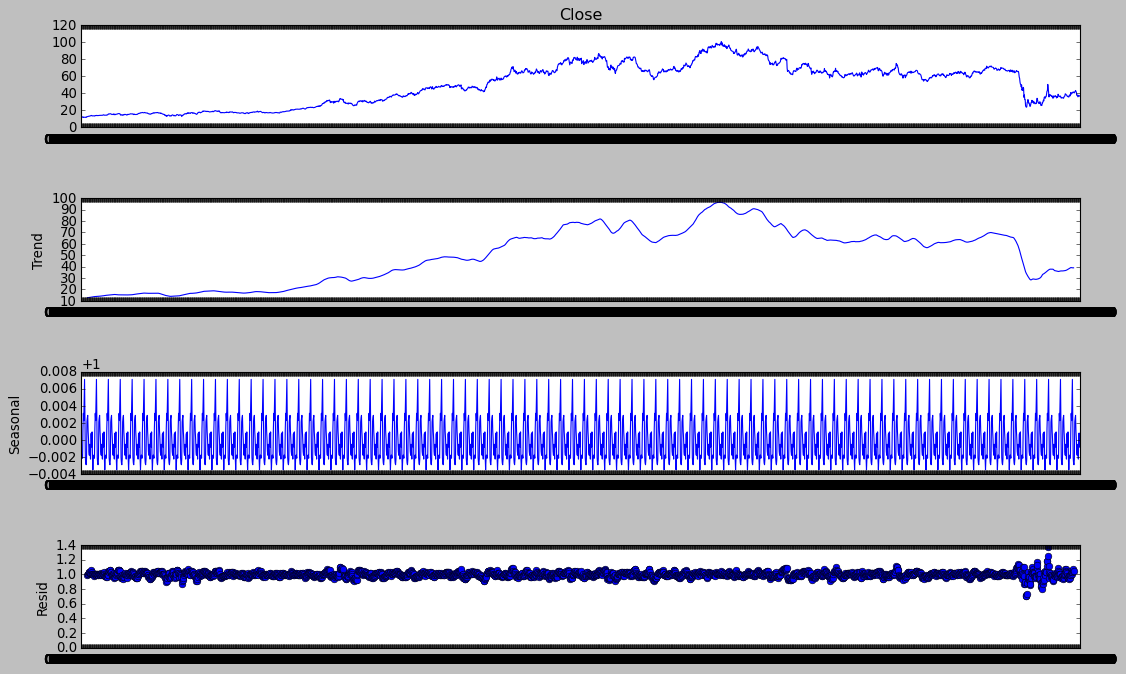

In [75]:
result = seasonal_decompose(df2_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [76]:
df2_log = np.log(df2_close)

In [77]:
#split data into train and training set
train_data2, test_data2 = df2_log[3:int(len(df2_log)*0.7)], df2_log[int(len(df2_log)*0.7):]

In [78]:
model_autoARIMA = auto_arima(train_data2, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8915.430, Time=0.36 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8918.589, Time=0.59 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8918.558, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8912.230, Time=0.36 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-8916.579, Time=0.58 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-8916.557, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-8914.365, Time=0.61 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-8914.799, Time=0.12 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 3.500 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1758
Model:               SARIMAX(1, 1, 0)   Log Likelihood                4462.294
Date:                Mon, 15 Aug 2022   AIC                          -8918.589
Time:                       

In [79]:
model = ARIMA(train_data2, order=(1, 1, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1757
Model:                 ARIMA(1, 1, 0)   Log Likelihood                4462.294
Method:                       css-mle   S.D. of innovations              0.019
Date:                Mon, 15 Aug 2022   AIC                          -8918.589
Time:                        19:50:45   BIC                          -8902.175
Sample:                             1   HQIC                         -8912.522
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0010      0.000      2.412      0.016       0.000       0.002
ar.L1.D.Close    -0.0542      0.024     -2.273      0.023      -0.101      -0.007
                                    Root

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

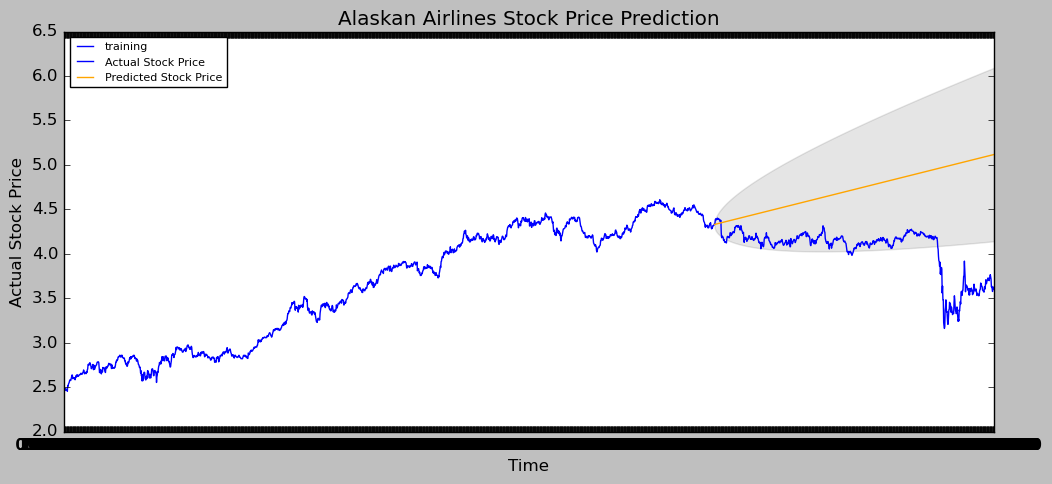

In [80]:
# Forecast
fc, se, conf = fitted.forecast(756, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data2.index)
lower_series = pd.Series(conf[:, 0], index=test_data2.index)
upper_series = pd.Series(conf[:, 1], index=test_data2.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data2, label='training')
plt.plot(test_data2, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Alaskan Airlines Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [81]:
rmse = math.sqrt(mean_squared_error(test_data2, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data2)/np.abs(test_data2))
print('MAPE: '+str(mape))

RMSE: 0.8141641776671821
MAPE: 0.17651976517473209


#### Hawaiian Airlines - HA

In [82]:
df3 = pd.read_csv('HA.csv',index_col='Date')
df3.dropna()
df3_close = df3['Close']
df3_close = df3_close.dropna()

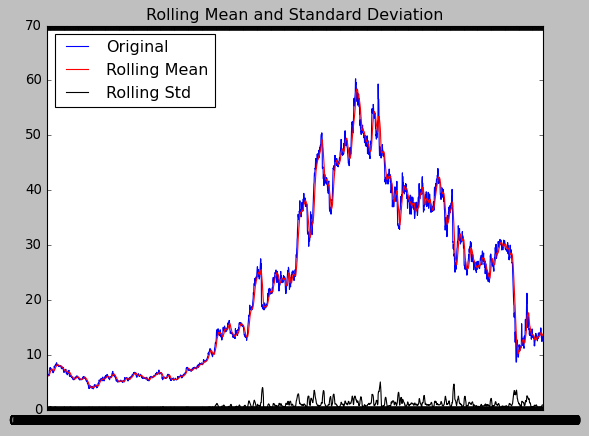

Results of dickey fuller test
Test Statistics                  -1.352906
p-value                           0.604634
No. of lags used                  5.000000
Number of observations used    2511.000000
critical value (1%)              -3.432957
critical value (5%)              -2.862692
critical value (10%)             -2.567383
dtype: float64


In [83]:
def test_stationarity(timeseries):
 
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
  
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
  
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df3_close)

<Figure size 640x480 with 0 Axes>

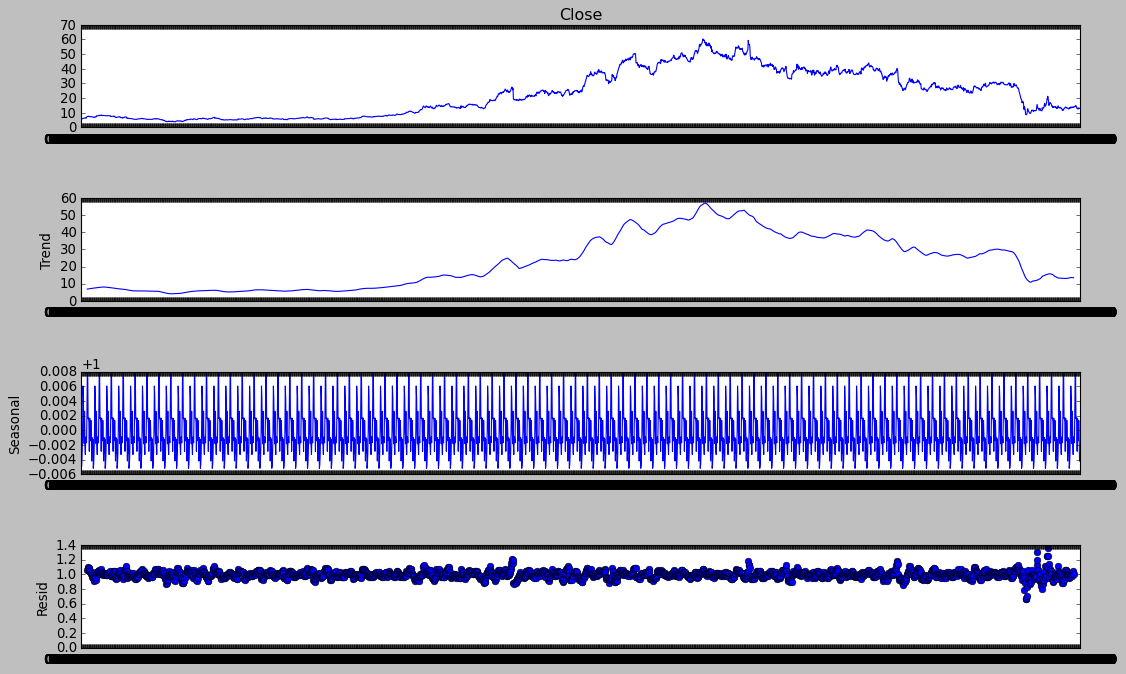

In [84]:
result = seasonal_decompose(df3_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [85]:
df3_log = np.log(df3_close)
#split data into train and training set
train_data3, test_data3 = df3_log[3:int(len(df3_log)*0.7)], df3_log[int(len(df3_log)*0.7):]

In [86]:
model_autoARIMA = auto_arima(train_data3, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7824.688, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7826.131, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7825.760, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7823.909, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-7828.700, Time=0.48 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-7829.858, Time=0.24 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-7827.982, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-7826.062, Time=0.26 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-7829.346, Time=0.24 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0] intercept
Total fit time: 2.172 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1758
Model:               SARIMAX(3, 1, 0)   Log Likelihood                3919.929
Date:                Mon, 15 Aug 2022   

In [87]:
model = ARIMA(train_data3, order=(3, 1, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1757
Model:                 ARIMA(3, 1, 0)   Log Likelihood                3919.929
Method:                       css-mle   S.D. of innovations              0.026
Date:                Mon, 15 Aug 2022   AIC                          -7829.858
Time:                        19:53:34   BIC                          -7802.501
Sample:                             1   HQIC                         -7819.747
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0010      0.001      1.589      0.112      -0.000       0.002
ar.L1.D.Close    -0.0442      0.024     -1.854      0.064      -0.091       0.003
ar.L2.D.Close     0.0527      0.024     

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

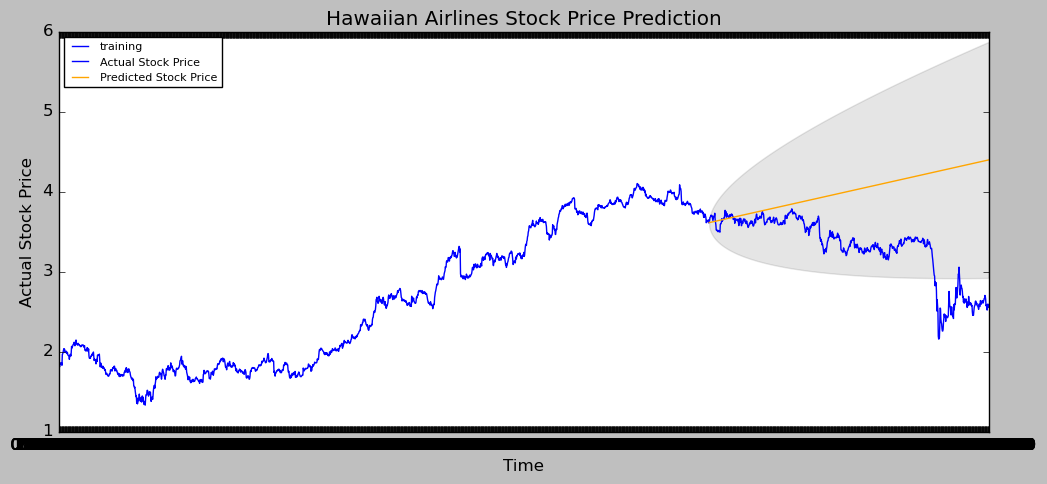

In [88]:
# Forecast
fc, se, conf = fitted.forecast(756, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data3.index)
lower_series = pd.Series(conf[:, 0], index=test_data3.index)
upper_series = pd.Series(conf[:, 1], index=test_data3.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data3, label='training')
plt.plot(test_data3, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Hawaiian Airlines Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [89]:
rmse = math.sqrt(mean_squared_error(test_data3, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data3)/np.abs(test_data3))
print('MAPE: '+str(mape))

RMSE: 0.9190262148094495
MAPE: 0.24104978857229314


#### Credit Suisse - CS

In [90]:
df4 = pd.read_csv('CS.csv',index_col='Date')
df4.dropna()
df4_close = df4['Close']
df4_close = df4_close.dropna()

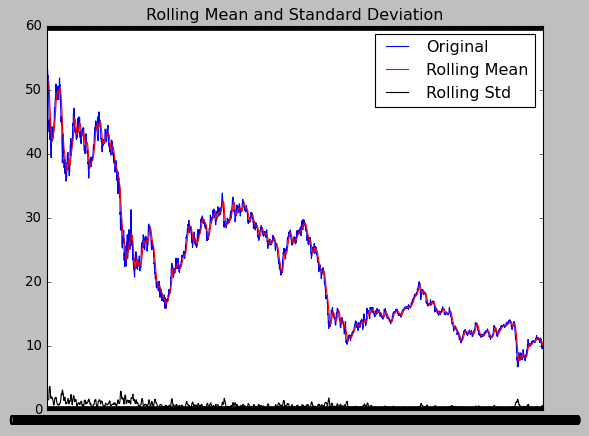

Results of dickey fuller test
Test Statistics                  -1.670493
p-value                           0.446376
No. of lags used                 26.000000
Number of observations used    2678.000000
critical value (1%)              -3.432794
critical value (5%)              -2.862620
critical value (10%)             -2.567345
dtype: float64


In [91]:
def test_stationarity(timeseries):
 
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
  
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
  
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df4_close)

<Figure size 640x480 with 0 Axes>

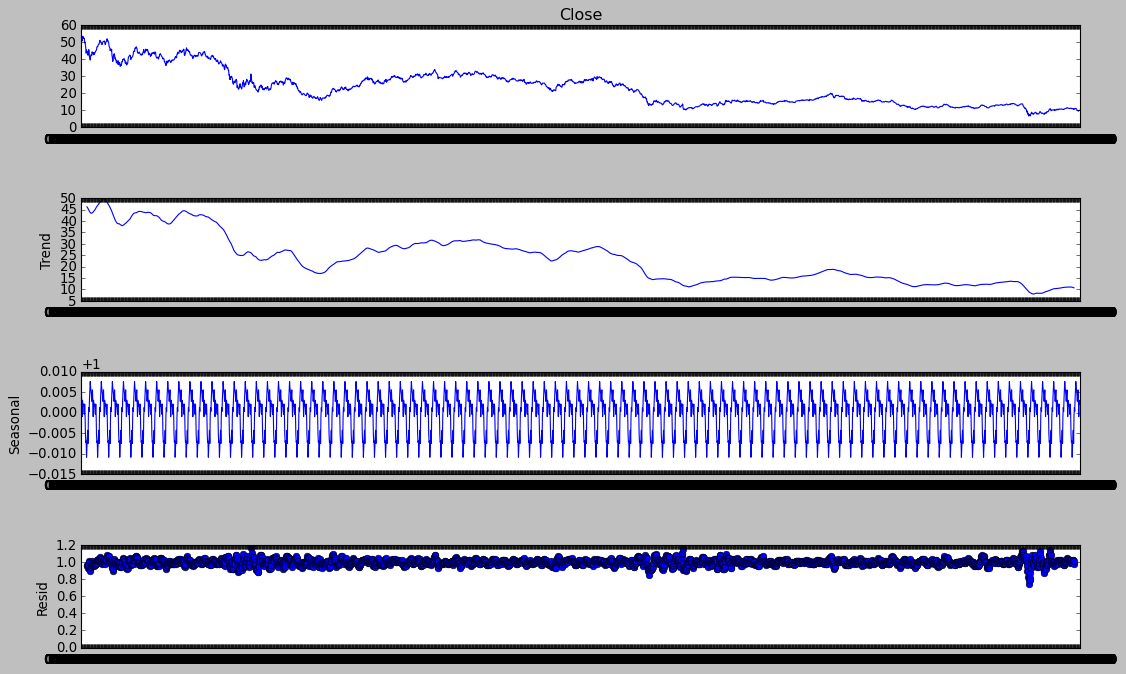

In [92]:
result = seasonal_decompose(df4_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [93]:
df4_log = np.log(df4_close)
#split data into train and training set
train_data4, test_data4 = df4_log[3:int(len(df4_log)*0.7)], df4_log[int(len(df4_log)*0.7):]

In [94]:
model_autoARIMA = auto_arima(train_data4, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8950.209, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8948.219, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8948.218, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8950.613, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-8947.035, Time=0.54 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.173 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1890
Model:               SARIMAX(0, 1, 0)   Log Likelihood                4476.307
Date:                Mon, 15 Aug 2022   AIC                          -8950.613
Time:                        19:56:33   BIC                          -8945.069
Sample:                             0   HQIC                         -8948.572
                               - 1890                                  

In [95]:
model = ARIMA(train_data4, order=(0, 1, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1889
Model:                 ARIMA(0, 1, 0)   Log Likelihood                4477.104
Method:                           css   S.D. of innovations              0.023
Date:                Mon, 15 Aug 2022   AIC                          -8950.209
Time:                        19:56:33   BIC                          -8939.121
Sample:                             1   HQIC                         -8946.126
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0007      0.001     -1.263      0.206      -0.002       0.000


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

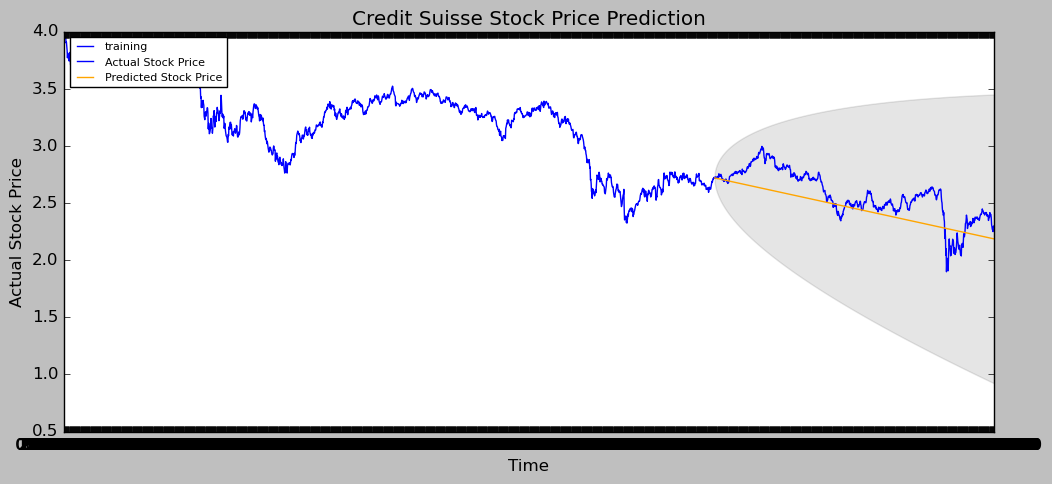

In [96]:
# Forecast
fc, se, conf = fitted.forecast(812, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data4.index)
lower_series = pd.Series(conf[:, 0], index=test_data4.index)
upper_series = pd.Series(conf[:, 1], index=test_data4.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data4, label='training')
plt.plot(test_data4, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Credit Suisse Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [97]:
rmse = math.sqrt(mean_squared_error(test_data4, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data4)/np.abs(test_data4))
print('MAPE: '+str(mape))

RMSE: 0.1725761173427483
MAPE: 0.056502504182326385


#### Deutsche Bank - DB

In [98]:
df5 = pd.read_csv('DB.csv',index_col='Date')
df5.dropna()
df5_close = df5['Close']
df5_close = df5_close.dropna()

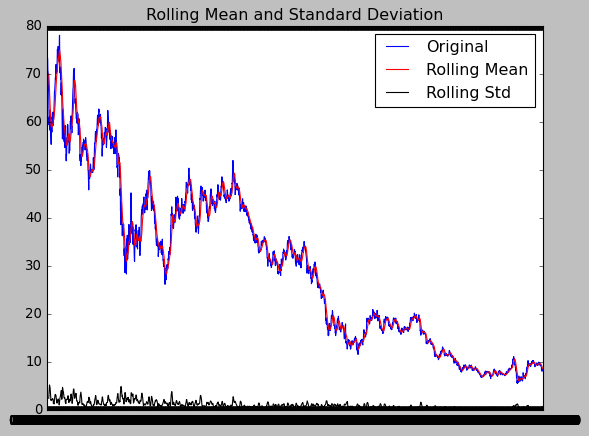

Results of dickey fuller test
Test Statistics                  -1.549903
p-value                           0.508697
No. of lags used                 25.000000
Number of observations used    2679.000000
critical value (1%)              -3.432793
critical value (5%)              -2.862619
critical value (10%)             -2.567345
dtype: float64


In [99]:
def test_stationarity(timeseries):
 
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
  
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
  
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df5_close)

<Figure size 640x480 with 0 Axes>

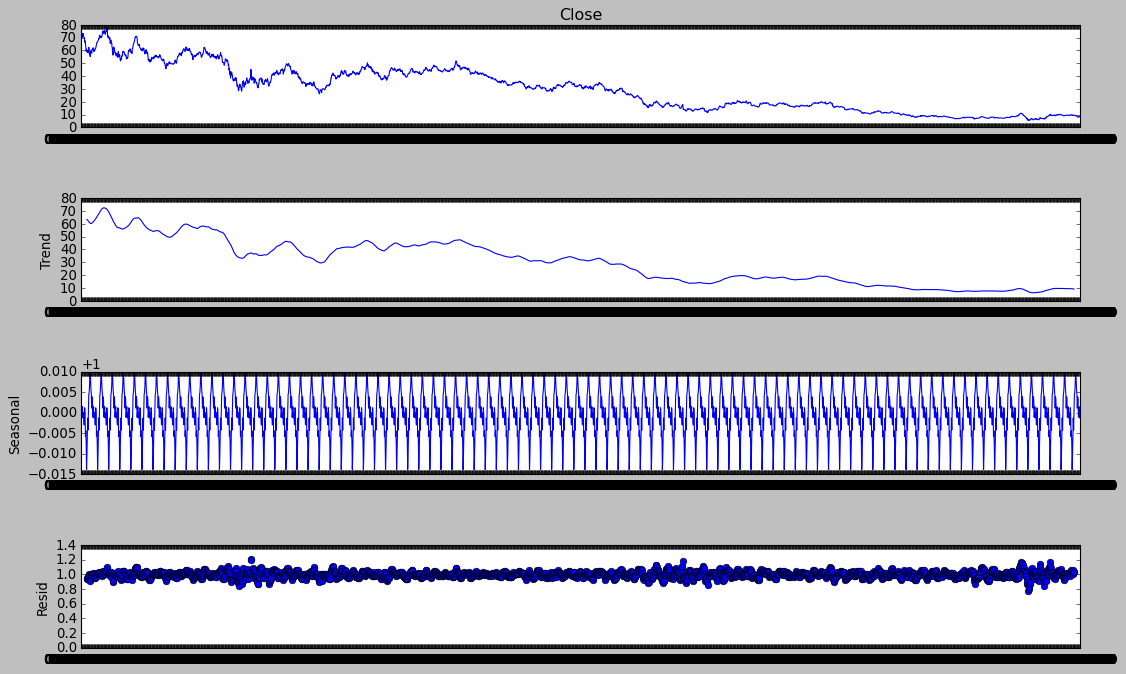

In [100]:
result = seasonal_decompose(df5_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [101]:
df5_log = np.log(df5_close)
#split data into train and training set
train_data5, test_data5 = df5_log[3:int(len(df5_log)*0.7)], df5_log[int(len(df5_log)*0.7):]

In [102]:
model_autoARIMA = auto_arima(train_data5, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8393.339, Time=0.32 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8391.343, Time=0.41 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8391.341, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8394.014, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-8389.339, Time=0.19 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.227 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1890
Model:               SARIMAX(0, 1, 0)   Log Likelihood                4198.007
Date:                Mon, 15 Aug 2022   AIC                          -8394.014
Time:                        20:55:47   BIC                          -8388.470
Sample:                             0   HQIC                         -8391.973
                               - 1890                                  

In [103]:
model = ARIMA(train_data5, order=(0, 1, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1889
Model:                 ARIMA(0, 1, 0)   Log Likelihood                4198.669
Method:                           css   S.D. of innovations              0.026
Date:                Mon, 15 Aug 2022   AIC                          -8393.339
Time:                        20:55:47   BIC                          -8382.251
Sample:                             1   HQIC                         -8389.256
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0007      0.001     -1.151      0.250      -0.002       0.000


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

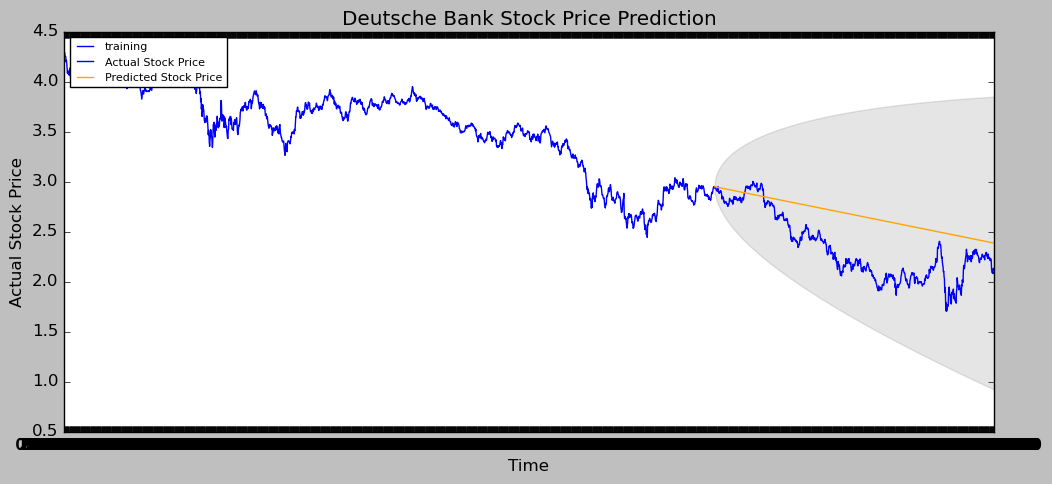

In [104]:
# Forecast
fc, se, conf = fitted.forecast(812, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data5.index)
lower_series = pd.Series(conf[:, 0], index=test_data5.index)
upper_series = pd.Series(conf[:, 1], index=test_data5.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data5, label='training')
plt.plot(test_data5, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Deutsche Bank Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [105]:
rmse = math.sqrt(mean_squared_error(test_data5, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data5)/np.abs(test_data5))
print('MAPE: '+str(mape))

RMSE: 0.3948442606486085
MAPE: 0.15882918023404616


#### Goldman Sachs - GS

In [106]:
df6 = pd.read_csv('GS.csv',index_col='Date')
df6.dropna()
df6_close = df6['Close']
df6_close = df6_close.dropna()

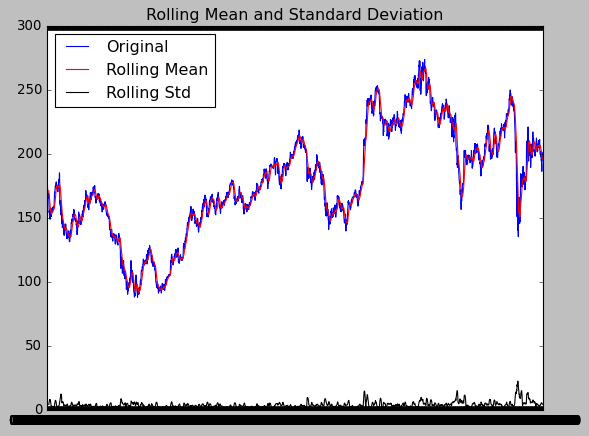

Results of dickey fuller test
Test Statistics                  -1.954439
p-value                           0.306900
No. of lags used                  9.000000
Number of observations used    2695.000000
critical value (1%)              -3.432779
critical value (5%)              -2.862613
critical value (10%)             -2.567341
dtype: float64


In [107]:
def test_stationarity(timeseries):
 
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
  
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
  
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df6_close)

<Figure size 640x480 with 0 Axes>

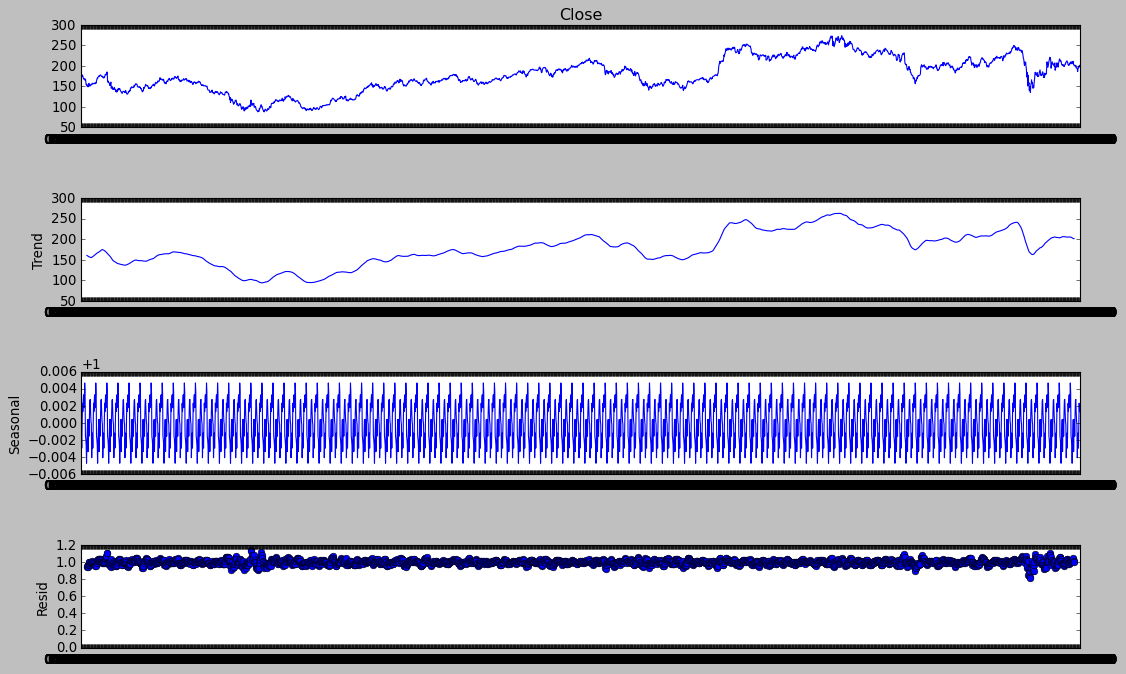

In [108]:
result = seasonal_decompose(df6_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [109]:
df6_log = np.log(df6_close)
#split data into train and training set
train_data6, test_data6 = df6_log[3:int(len(df6_log)*0.7)], df6_log[int(len(df6_log)*0.7):]

In [110]:
model_autoARIMA = auto_arima(train_data6, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-10037.176, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-10041.562, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-10041.150, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-10039.065, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-10041.628, Time=0.55 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-10040.461, Time=0.51 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-10041.726, Time=0.67 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-10043.407, Time=0.64 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-10042.733, Time=0.59 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-10041.290, Time=0.48 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-10037.455, Time=1.18 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-10045.291, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-10043.026, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-10043.437, Time=0.18 sec
 ARIM

In [111]:
model = ARIMA(train_data6, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1889
Model:                 ARIMA(1, 1, 1)   Log Likelihood                5026.896
Method:                       css-mle   S.D. of innovations              0.017
Date:                Mon, 15 Aug 2022   AIC                         -10045.791
Time:                        20:58:54   BIC                         -10023.616
Sample:                             1   HQIC                        -10037.626
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0001      0.000      0.339      0.734      -0.001       0.001
ar.L1.D.Close    -0.9302      0.041    -22.524      0.000      -1.011      -0.849
ma.L1.D.Close     0.9003      0.049     

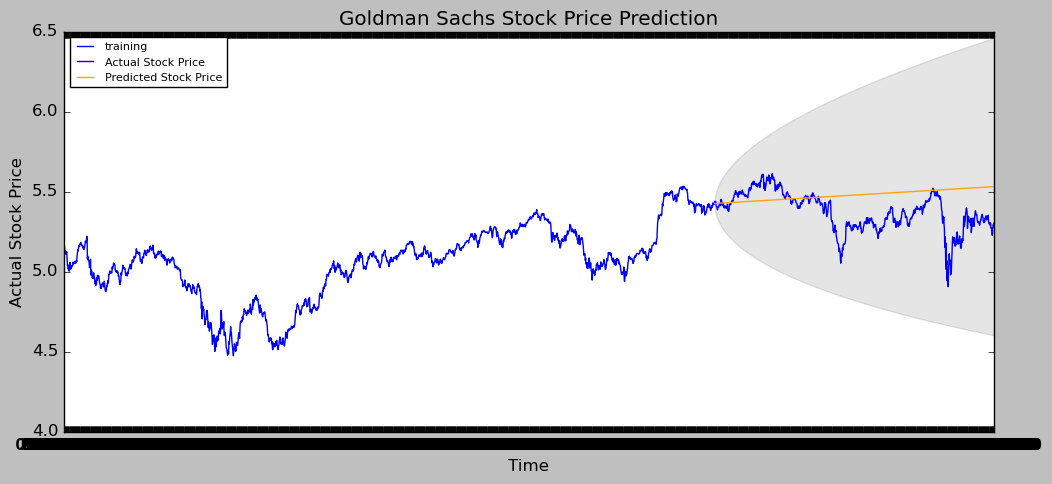

In [112]:
fc, se, conf = fitted.forecast(812, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data6.index)
lower_series = pd.Series(conf[:, 0], index=test_data6.index)
upper_series = pd.Series(conf[:, 1], index=test_data6.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data6, label='training')
plt.plot(test_data6, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Goldman Sachs Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [113]:
rmse = math.sqrt(mean_squared_error(test_data6, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data6)/np.abs(test_data6))
print('MAPE: '+str(mape))

RMSE: 0.1750099289249339
MAPE: 0.026081617068159445


#### Bausch Healthcare - BHC

In [114]:
df7 = pd.read_csv('BHC.csv',index_col='Date')
df7.dropna()
df7_close = df7['Close']
df7_close = df7_close.dropna()

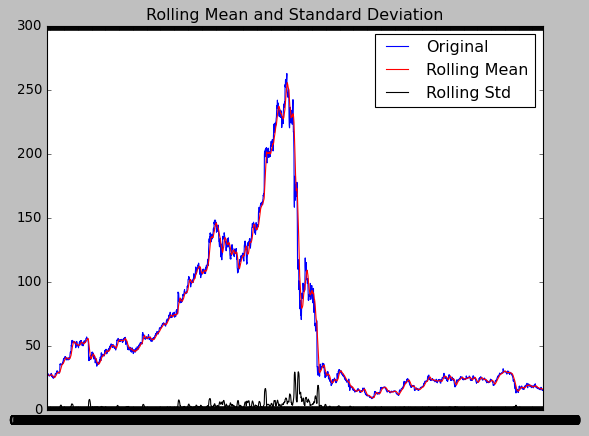

Results of dickey fuller test
Test Statistics                  -1.473062
p-value                           0.546793
No. of lags used                 17.000000
Number of observations used    2499.000000
critical value (1%)              -3.432969
critical value (5%)              -2.862697
critical value (10%)             -2.567386
dtype: float64


In [115]:
def test_stationarity(timeseries):
 
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
  
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
  
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df7_close)

<Figure size 640x480 with 0 Axes>

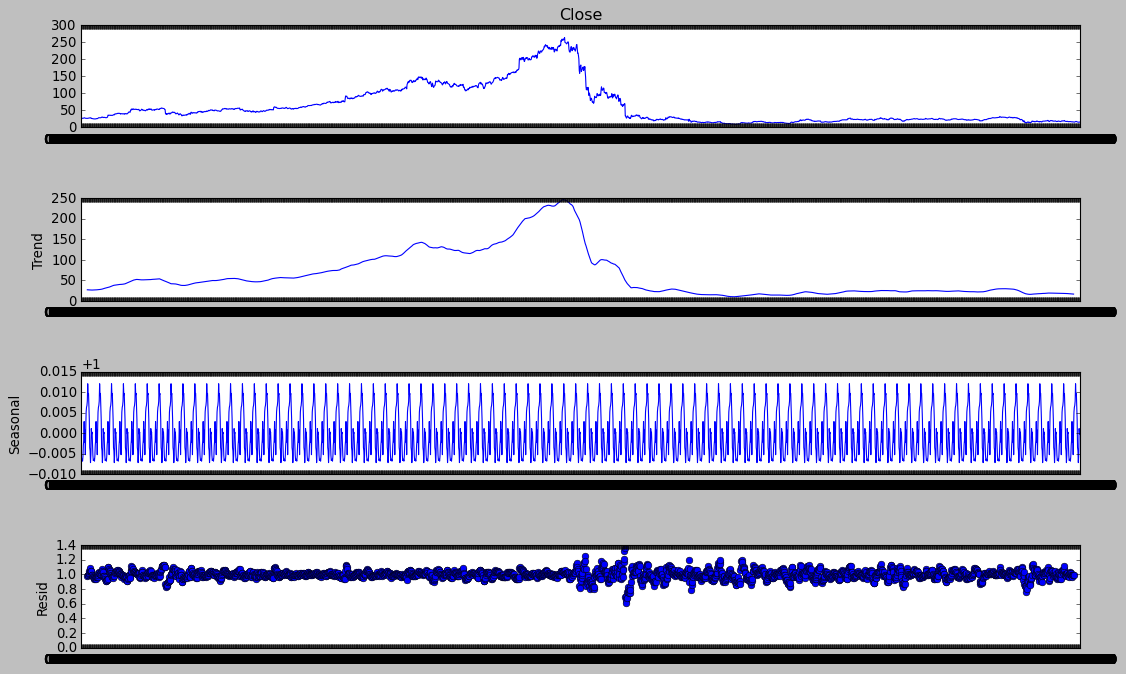

In [116]:
result = seasonal_decompose(df7_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [117]:
df7_log = np.log(df7_close)
#split data into train and training set
train_data7, test_data7 = df7_log[3:int(len(df7_log)*0.7)], df7_log[int(len(df7_log)*0.7):]

In [118]:
model_autoARIMA = auto_arima(train_data7, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6469.037, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6468.495, Time=0.43 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6468.663, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6470.867, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6469.769, Time=0.40 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.569 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1758
Model:               SARIMAX(0, 1, 0)   Log Likelihood                3236.433
Date:                Mon, 15 Aug 2022   AIC                          -6470.867
Time:                        21:01:44   BIC                          -6465.395
Sample:                             0   HQIC                         -6468.844
                               - 1758                                  

In [119]:
model = ARIMA(train_data7, order=(0, 1, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1757
Model:                 ARIMA(0, 1, 0)   Log Likelihood                3236.518
Method:                           css   S.D. of innovations              0.038
Date:                Mon, 15 Aug 2022   AIC                          -6469.037
Time:                        21:01:44   BIC                          -6458.094
Sample:                             1   HQIC                         -6464.992
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.001     -0.412      0.680      -0.002       0.001


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

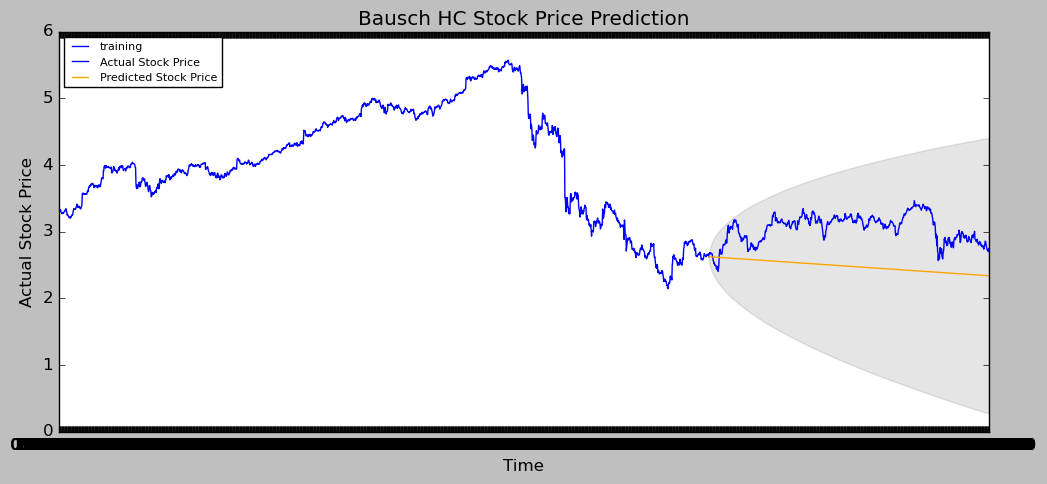

In [120]:
fc, se, conf = fitted.forecast(756, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data7.index)
lower_series = pd.Series(conf[:, 0], index=test_data7.index)
upper_series = pd.Series(conf[:, 1], index=test_data7.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data7, label='training')
plt.plot(test_data7, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Bausch HC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [121]:
rmse = math.sqrt(mean_squared_error(test_data7, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data7)/np.abs(test_data7))
print('MAPE: '+str(mape))

RMSE: 0.6111005570641557
MAPE: 0.18362835106564554


#### Johnson & Johnson - JNJ 

In [122]:
df8 = pd.read_csv('JNJ.csv',index_col='Date')
df8.dropna()
df8_close = df8['Close']
df8_close = df8_close.dropna()

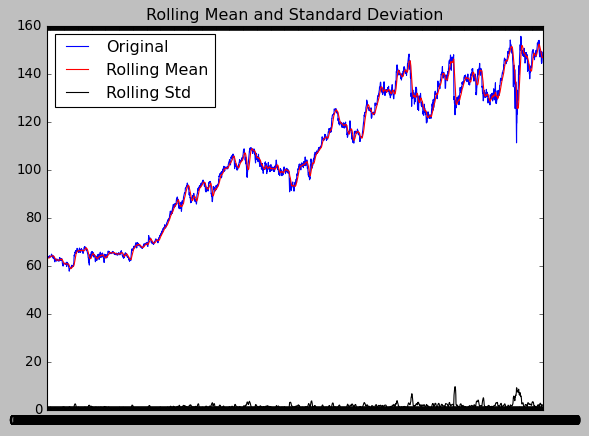

Results of dickey fuller test
Test Statistics                  -0.940294
p-value                           0.774414
No. of lags used                 13.000000
Number of observations used    2503.000000
critical value (1%)              -3.432965
critical value (5%)              -2.862695
critical value (10%)             -2.567385
dtype: float64


In [123]:
def test_stationarity(timeseries):
 
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
  
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
  
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df8_close)

<Figure size 640x480 with 0 Axes>

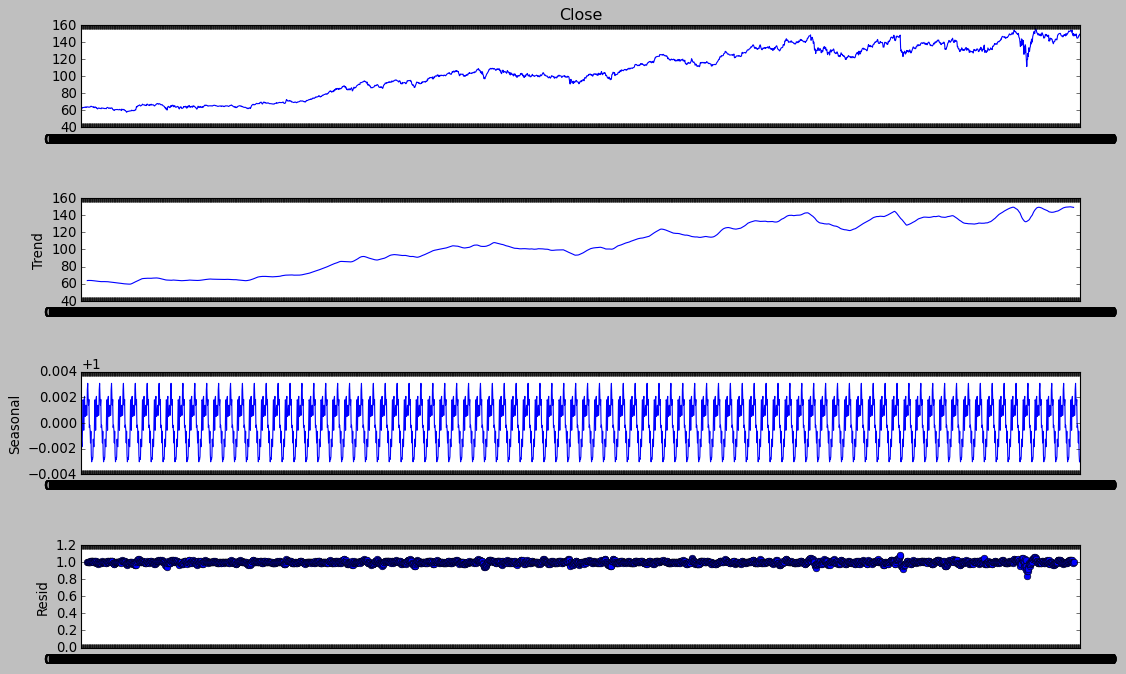

In [124]:
result = seasonal_decompose(df8_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [125]:
df8_log = np.log(df8_close)
#split data into train and training set
train_data8, test_data8 = df8_log[3:int(len(df8_log)*0.7)], df8_log[int(len(df8_log)*0.7):]

In [126]:
model_autoARIMA = auto_arima(train_data8, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11677.498, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-11679.143, Time=0.43 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-11679.051, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11675.646, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-11677.375, Time=1.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-11677.279, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-11675.360, Time=0.39 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-11676.932, Time=0.12 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 2.828 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1758
Model:               SARIMAX(1, 1, 0)   Log Likelihood                5842.571
Date:                Mon, 15 Aug 2022   AIC                         -11679.143
Time:               

In [127]:
model = ARIMA(train_data8, order=(1, 1, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1757
Model:                 ARIMA(1, 1, 0)   Log Likelihood                5842.571
Method:                       css-mle   S.D. of innovations              0.009
Date:                Mon, 15 Aug 2022   AIC                         -11679.143
Time:                        21:04:33   BIC                         -11662.729
Sample:                             1   HQIC                        -11673.076
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0004      0.000      2.055      0.040     1.9e-05       0.001
ar.L1.D.Close    -0.0455      0.024     -1.910      0.056      -0.092       0.001
                                    Root

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

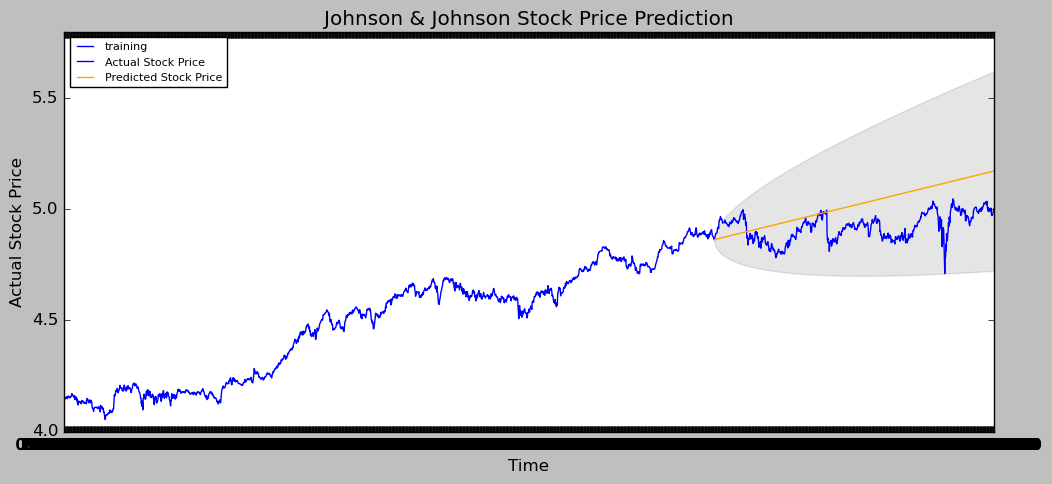

In [128]:
fc, se, conf = fitted.forecast(756, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data8.index)
lower_series = pd.Series(conf[:, 0], index=test_data8.index)
upper_series = pd.Series(conf[:, 1], index=test_data8.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data8, label='training')
plt.plot(test_data8, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Johnson & Johnson Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [129]:
rmse = math.sqrt(mean_squared_error(test_data8, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data8)/np.abs(test_data8))
print('MAPE: '+str(mape))

RMSE: 0.12775120396960743
MAPE: 0.02287587928599122


#### Merck & Co. MRK

In [130]:
df9 = pd.read_csv('MRK.csv',index_col='Date')
df9.dropna()
df9_close = df9['Close']
df9_close = df9_close.dropna()

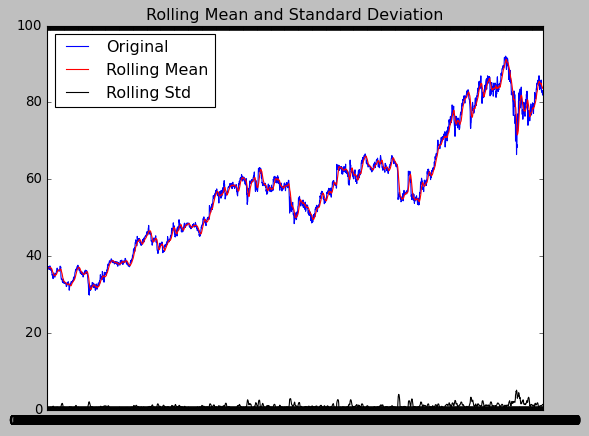

Results of dickey fuller test
Test Statistics                  -0.713622
p-value                           0.843189
No. of lags used                 15.000000
Number of observations used    2501.000000
critical value (1%)              -3.432967
critical value (5%)              -2.862696
critical value (10%)             -2.567386
dtype: float64


In [131]:
def test_stationarity(timeseries):
 
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
  
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
  
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df9_close)

<Figure size 640x480 with 0 Axes>

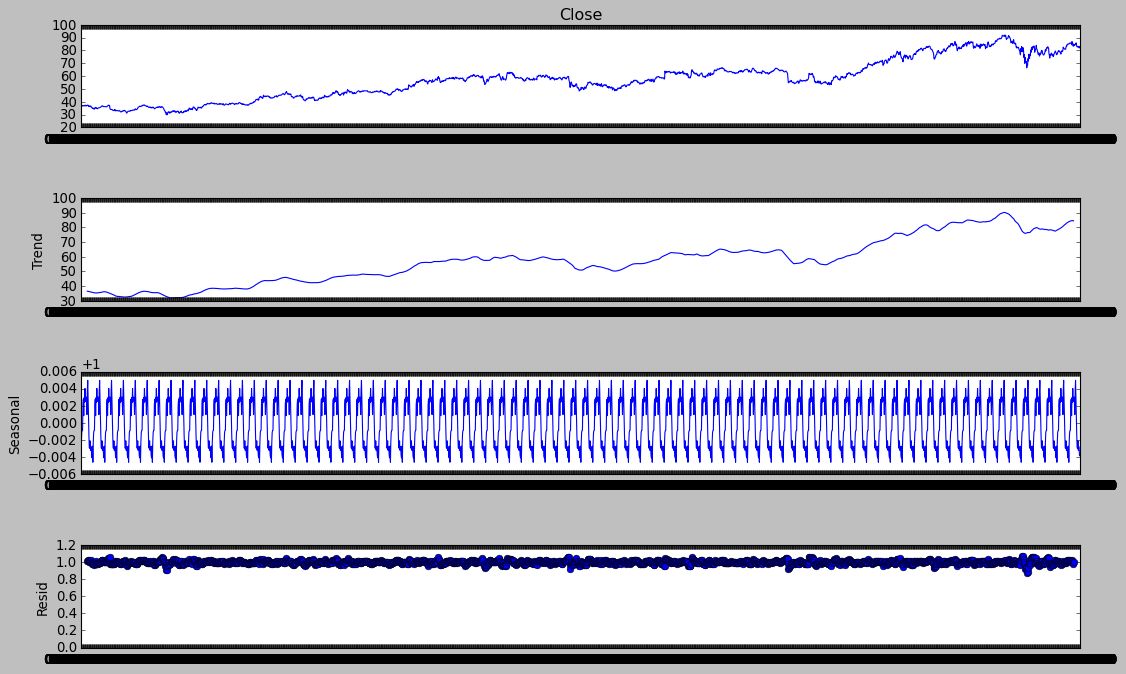

In [132]:
result = seasonal_decompose(df9_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [133]:
df9_log = np.log(df9_close)
#split data into train and training set
train_data9, test_data9 = df9_log[3:int(len(df9_log)*0.7)], df9_log[int(len(df9_log)*0.7):]

In [134]:
model_autoARIMA = auto_arima(train_data9, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-10583.430, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-10584.514, Time=0.35 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-10584.554, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-10584.203, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-10583.027, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-10582.660, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-10580.956, Time=0.51 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-10585.213, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-10583.593, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-10583.296, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-10585.179, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-10581.744, Time=0.76 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 3.494 seconds
                               SARIMAX Results                  

In [135]:
model = ARIMA(train_data9, order=(0, 1, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1757
Model:                 ARIMA(0, 1, 1)   Log Likelihood                5295.278
Method:                       css-mle   S.D. of innovations              0.012
Date:                Mon, 15 Aug 2022   AIC                         -10584.556
Time:                        21:07:23   BIC                         -10568.142
Sample:                             1   HQIC                        -10578.489
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0003      0.000      1.159      0.246      -0.000       0.001
ma.L1.D.Close    -0.0425      0.024     -1.767      0.077      -0.090       0.005
                                    Root

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

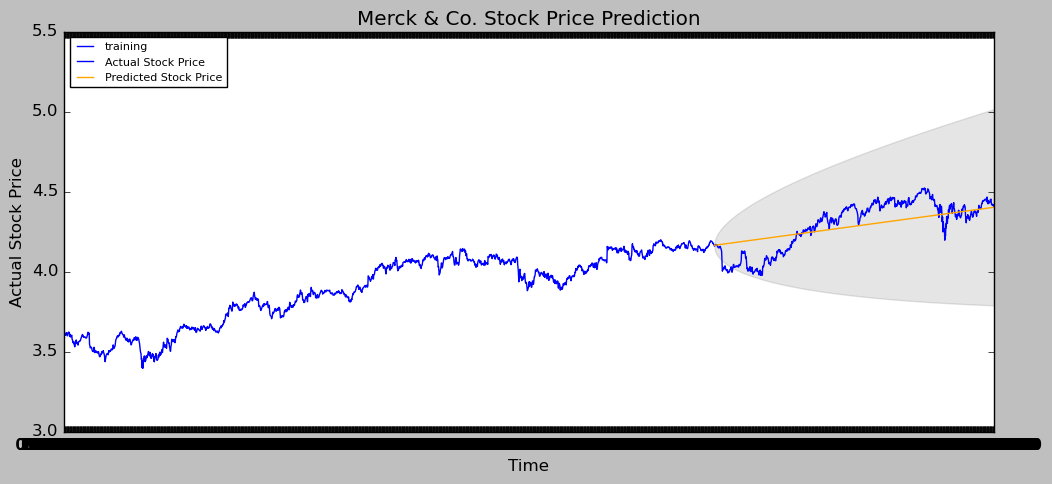

In [136]:
fc, se, conf = fitted.forecast(756, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data9.index)
lower_series = pd.Series(conf[:, 0], index=test_data9.index)
upper_series = pd.Series(conf[:, 1], index=test_data9.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data9, label='training')
plt.plot(test_data9, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Merck & Co. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [137]:
rmse = math.sqrt(mean_squared_error(test_data9, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data9)/np.abs(test_data9))
print('MAPE: '+str(mape))

RMSE: 0.10530250493988637
MAPE: 0.020970446451531725


#### Apple - AAPL

In [138]:
df10 = pd.read_csv('AAPL.csv',index_col='Date')
df10.dropna()
df10_close = df10['Close']
df10_close = df10_close.dropna()

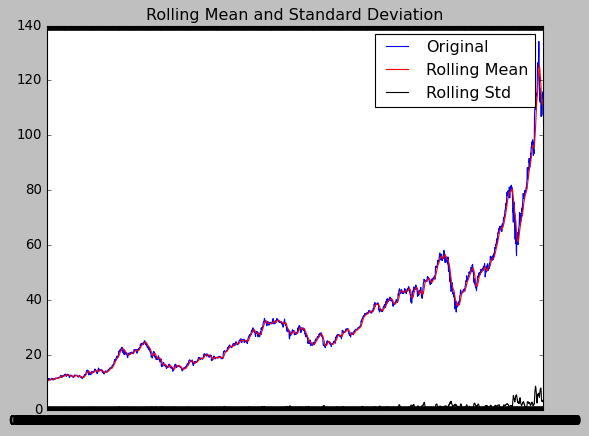

Results of dickey fuller test
Test Statistics                   2.709617
p-value                           0.999087
No. of lags used                 27.000000
Number of observations used    2489.000000
critical value (1%)              -3.432980
critical value (5%)              -2.862702
critical value (10%)             -2.567389
dtype: float64


In [139]:
def test_stationarity(timeseries):
 
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
  
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
  
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df10_close)

<Figure size 640x480 with 0 Axes>

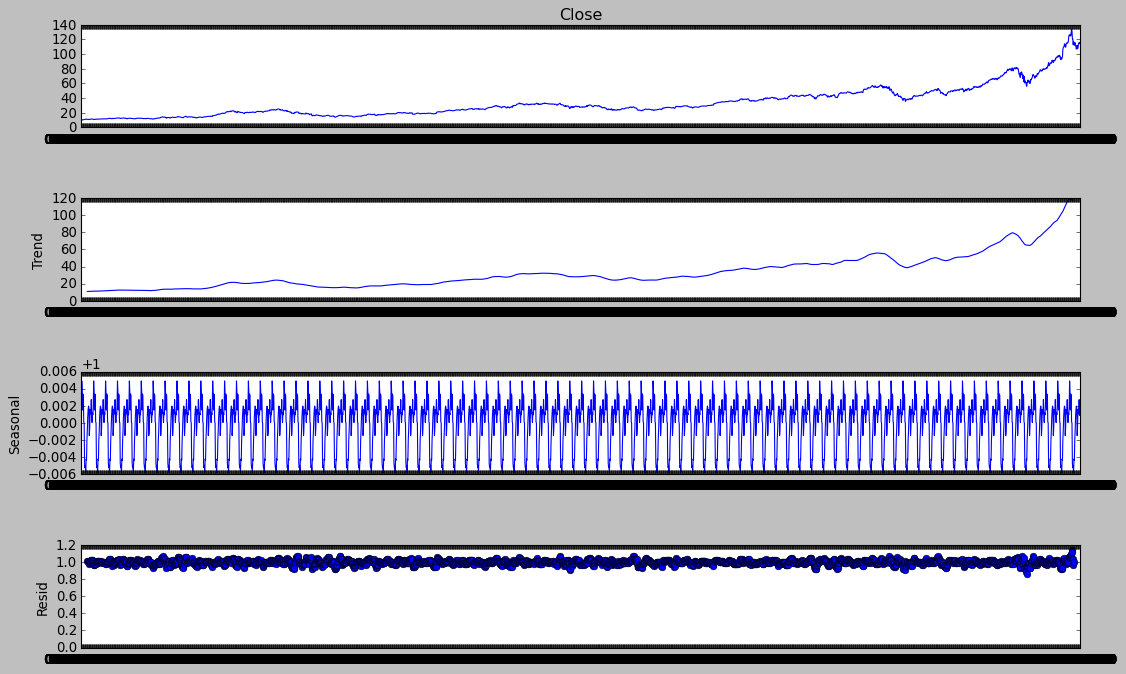

In [140]:
result = seasonal_decompose(df10_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [141]:
df10_log = np.log(df10_close)
#split data into train and training set
train_data10, test_data10 = df10_log[3:int(len(df10_log)*0.7)], df10_log[int(len(df10_log)*0.7):]

In [142]:
model_autoARIMA = auto_arima(train_data10, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-9573.872, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-9572.646, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-9572.659, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-9571.981, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-9570.600, Time=0.55 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.669 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1758
Model:               SARIMAX(0, 1, 0)   Log Likelihood                4788.936
Date:                Mon, 15 Aug 2022   AIC                          -9573.872
Time:                        21:10:12   BIC                          -9562.929
Sample:                             0   HQIC                         -9569.827
                               - 1758                                  

In [143]:
model = ARIMA(train_data10, order=(0, 1, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1757
Model:                 ARIMA(0, 1, 0)   Log Likelihood                4788.936
Method:                           css   S.D. of innovations              0.016
Date:                Mon, 15 Aug 2022   AIC                          -9573.872
Time:                        21:10:12   BIC                          -9562.929
Sample:                             1   HQIC                         -9569.827
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.000      1.973      0.048    5.07e-06       0.001


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

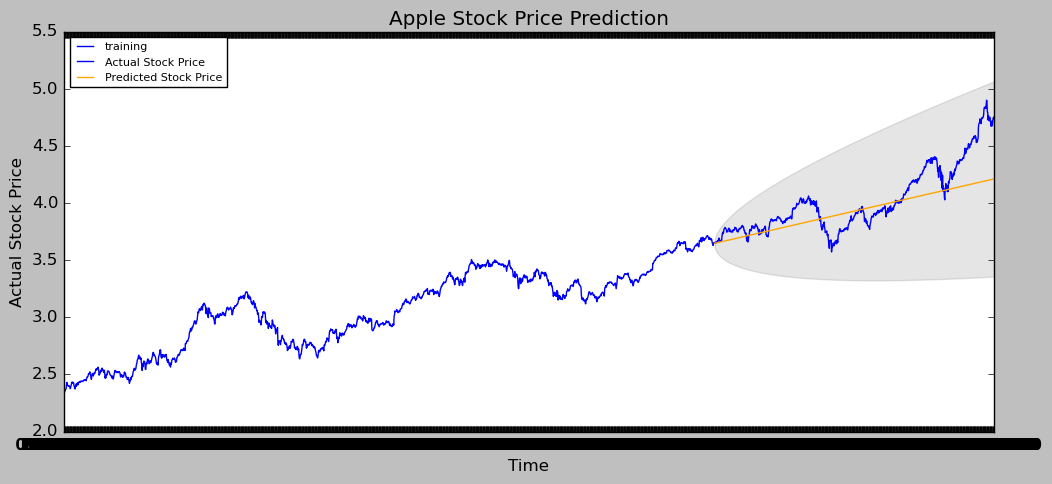

In [144]:
fc, se, conf = fitted.forecast(756, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data10.index)
lower_series = pd.Series(conf[:, 0], index=test_data10.index)
upper_series = pd.Series(conf[:, 1], index=test_data10.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data10, label='training')
plt.plot(test_data10, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [145]:
rmse = math.sqrt(mean_squared_error(test_data10, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data10)/np.abs(test_data10))
print('MAPE: '+str(mape))

RMSE: 0.19994190166970502
MAPE: 0.03454890400303895


#### Amazon - AMZN

In [146]:
df11 = pd.read_csv('AMZN.csv',index_col='Date')
df11.dropna()
df11_close = df11['Close']
df11_close = df11_close.dropna()

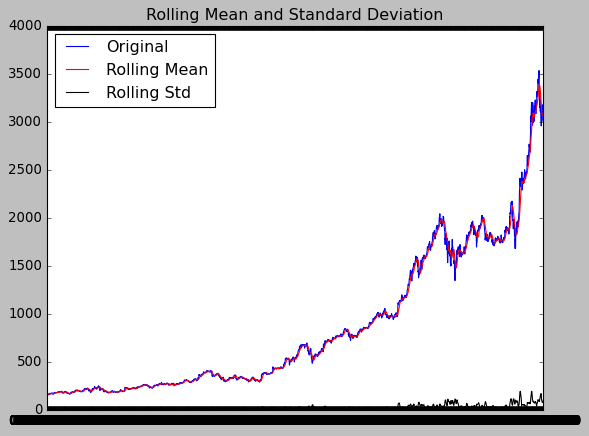

Results of dickey fuller test
Test Statistics                   2.739671
p-value                           0.999088
No. of lags used                 27.000000
Number of observations used    2489.000000
critical value (1%)              -3.432980
critical value (5%)              -2.862702
critical value (10%)             -2.567389
dtype: float64


In [147]:
def test_stationarity(timeseries):
 
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
  
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
  
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df11_close)

<Figure size 640x480 with 0 Axes>

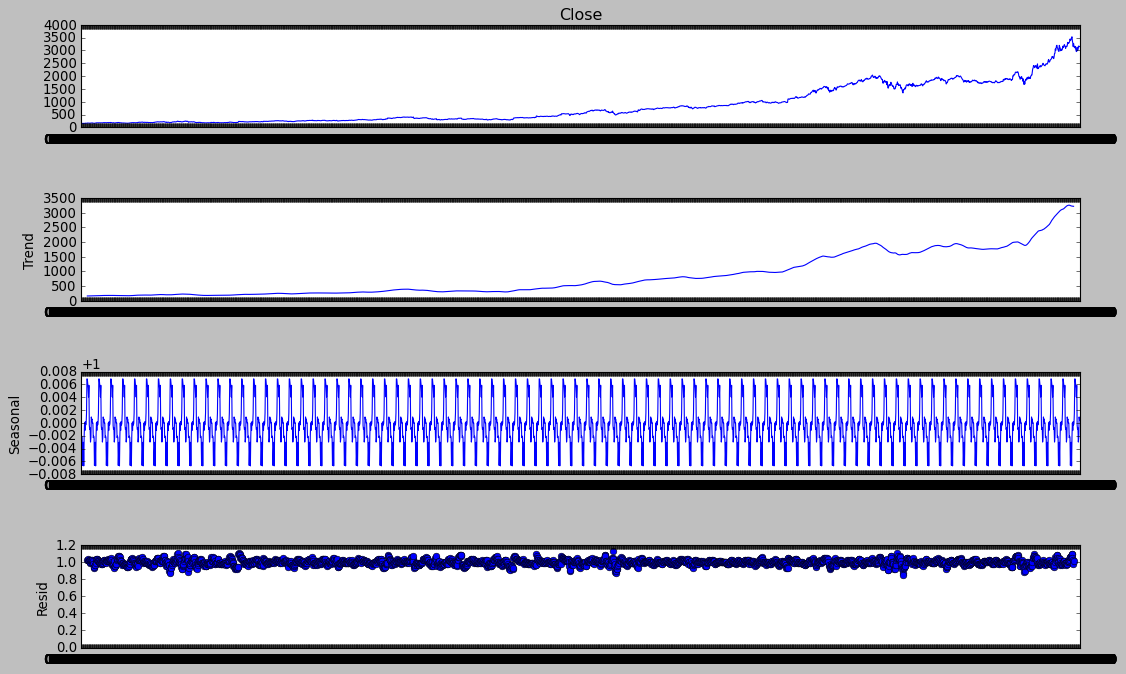

In [148]:
result = seasonal_decompose(df11_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [149]:
df11_log = np.log(df11_close)
#split data into train and training set
train_data11, test_data11 = df11_log[3:int(len(df11_log)*0.7)], df11_log[int(len(df11_log)*0.7):]

In [150]:
model_autoARIMA = auto_arima(train_data11, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8861.222, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8859.222, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8859.221, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8858.243, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-8857.222, Time=0.19 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.955 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1758
Model:               SARIMAX(0, 1, 0)   Log Likelihood                4432.611
Date:                Mon, 15 Aug 2022   AIC                          -8861.222
Time:                        21:13:01   BIC                          -8850.280
Sample:                             0   HQIC                         -8857.178
                               - 1758                                  

In [151]:
model = ARIMA(train_data11, order=(0, 1, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1757
Model:                 ARIMA(0, 1, 0)   Log Likelihood                4432.611
Method:                           css   S.D. of innovations              0.019
Date:                Mon, 15 Aug 2022   AIC                          -8861.222
Time:                        21:13:01   BIC                          -8850.280
Sample:                             1   HQIC                         -8857.178
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.000      2.233      0.026       0.000       0.002


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

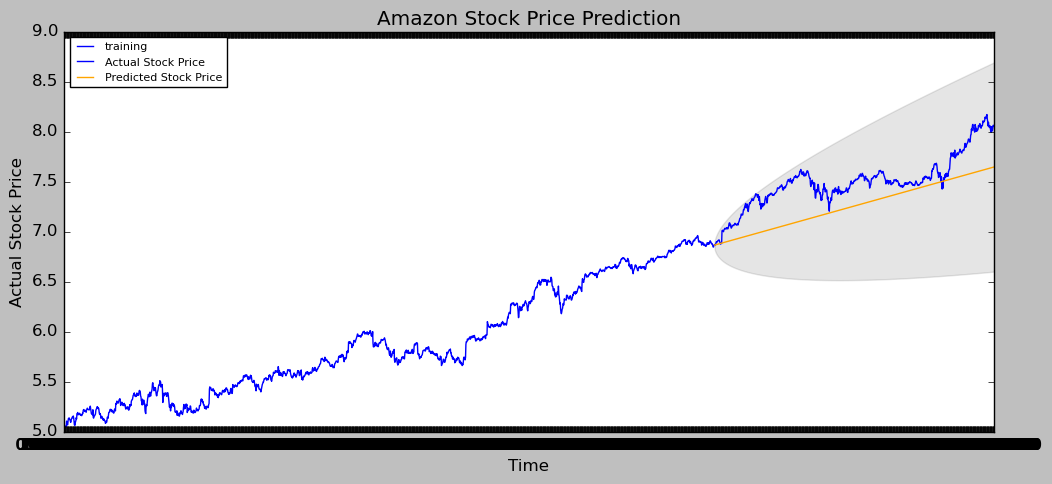

In [152]:
fc, se, conf = fitted.forecast(756, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data11.index)
lower_series = pd.Series(conf[:, 0], index=test_data11.index)
upper_series = pd.Series(conf[:, 1], index=test_data11.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data11, label='training')
plt.plot(test_data11, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [153]:
rmse = math.sqrt(mean_squared_error(test_data11, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data11)/np.abs(test_data11))
print('MAPE: '+str(mape))

RMSE: 0.27603641327547335
MAPE: 0.031927339405520706


#### Google - GOOG

In [154]:
df12 = pd.read_csv('GOOG.csv',index_col='Date')
df12.dropna()
df12_close = df12['Close']
df12_close = df12_close.dropna()

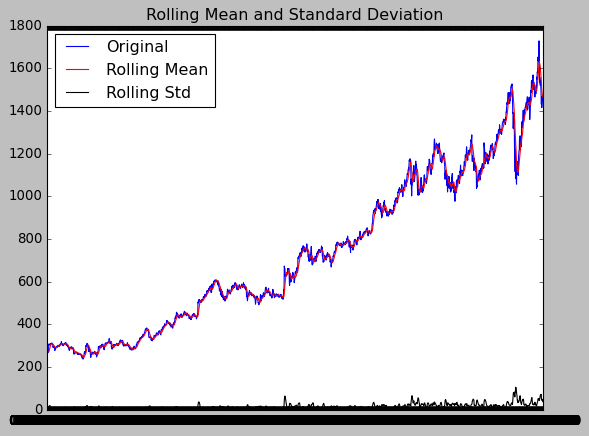

Results of dickey fuller test
Test Statistics                   0.188378
p-value                           0.971602
No. of lags used                 22.000000
Number of observations used    2494.000000
critical value (1%)              -3.432975
critical value (5%)              -2.862700
critical value (10%)             -2.567387
dtype: float64


In [155]:
def test_stationarity(timeseries):
 
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
  
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
  
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df12_close)

<Figure size 640x480 with 0 Axes>

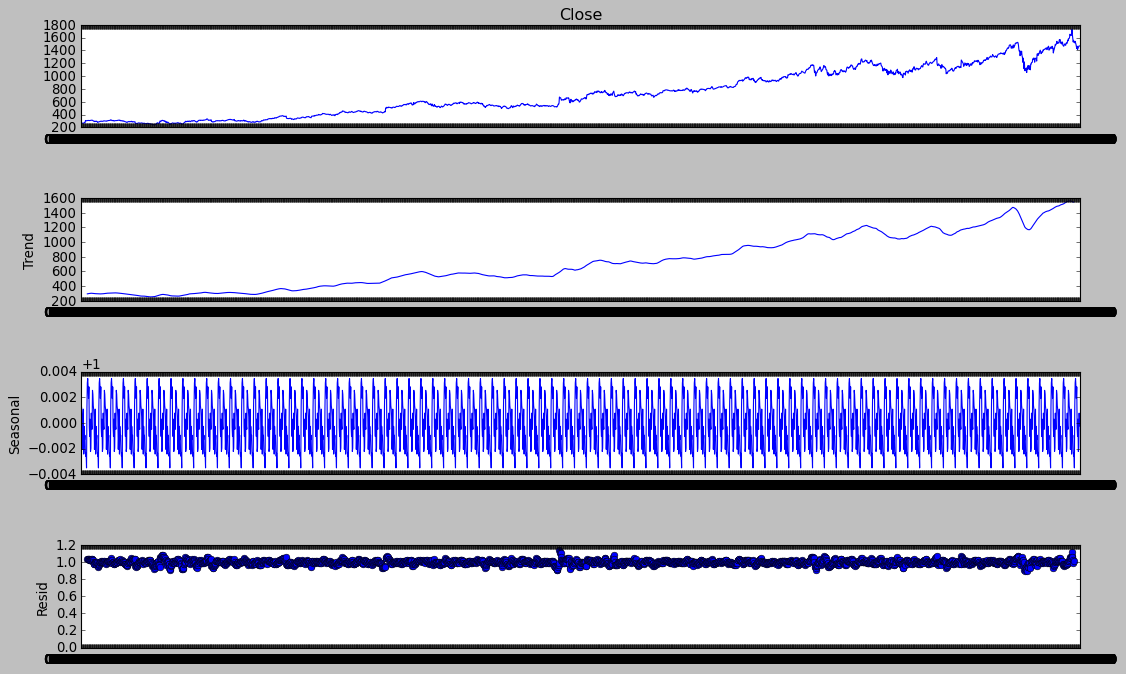

In [156]:
result = seasonal_decompose(df12_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [157]:
df12_log = np.log(df12_close)
#split data into train and training set
train_data12, test_data12 = df12_log[3:int(len(df12_log)*0.7)], df12_log[int(len(df12_log)*0.7):]

In [158]:
model_autoARIMA = auto_arima(train_data12, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=11408.082, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.59 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-9790.180, Time=0.83 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=1.19 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-9788.237, Time=1.64 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.40 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.65 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=2.47 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-9793.056, Time=0.55 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-597.045, Time=0.38 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-9788.430, Time=0.72 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-9791.583, Time=0.96 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1745.967, Time=0.18 

In [159]:
model = ARIMA(train_data12, order=(1, 0, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1758
Model:                     ARMA(1, 1)   Log Likelihood                4900.602
Method:                       css-mle   S.D. of innovations              0.015
Date:                Mon, 15 Aug 2022   AIC                          -9793.204
Time:                        21:16:01   BIC                          -9771.316
Sample:                             0   HQIC                         -9785.114
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.2128      0.479     12.978      0.000       5.275       7.151
ar.L1.Close     0.9996      0.000   2152.196      0.000       0.999       1.001
ma.L1.Close     0.0256      0.023      1.093    

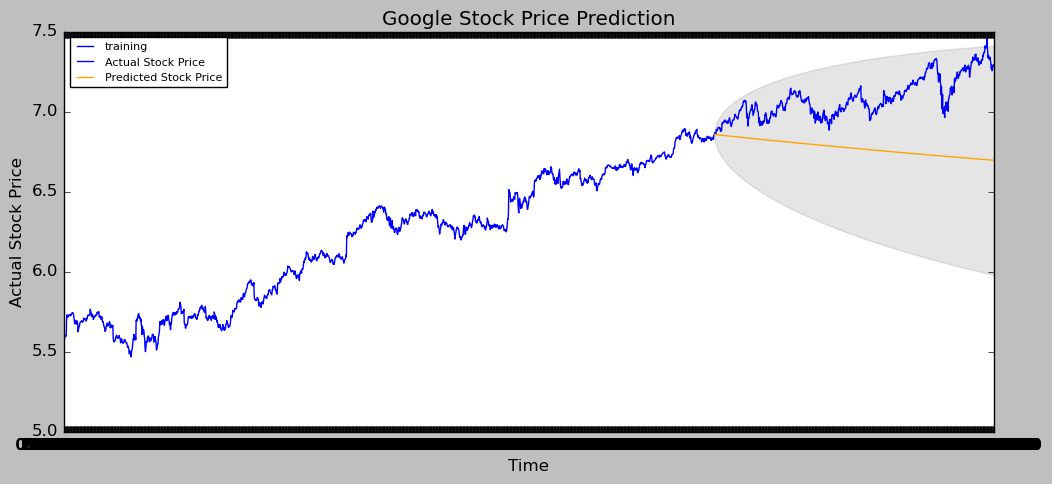

In [160]:
fc, se, conf = fitted.forecast(756, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data12.index)
lower_series = pd.Series(conf[:, 0], index=test_data12.index)
upper_series = pd.Series(conf[:, 1], index=test_data12.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data12, label='training')
plt.plot(test_data12, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [161]:
rmse = math.sqrt(mean_squared_error(test_data12, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data12)/np.abs(test_data12))
print('MAPE: '+str(mape))

RMSE: 0.35523061234632636
MAPE: 0.04394730721566965


## Portfolio Creation and Selection of the Stocks 

To predict the returns of the Portfolio and choosing the right stocks, the Beta value and Rate of Returns % are being used as yardstick. 

We had already calculated the Beta Value and Rate of Returns. 

For Stable and Safe portfolio the Stocks which are less volatile and provide decent returns.

In [174]:
print(Beta)
print(Expected_Return)

             Close
amer_air  1.348402
alsk_air  1.245418
hwi_air   1.247685
cred_sui  1.380244
deut_bk   1.540307
gld_schs  1.301164
bsh_hc    1.334568
jnj       0.657456
mrk       0.731885
apple     1.061613
amazon    0.995492
google    1.011770
Close     1.000000
              Close
amer_air  18.817709
alsk_air  17.381078
hwi_air   17.412699
cred_sui  19.261898
deut_bk   21.494786
gld_schs  18.158734
bsh_hc    18.624721
jnj        9.179007
mrk       10.217297
apple     14.816995
amazon    13.894612
google    14.121698
Close     13.957500


The Tech Giant stocks - Apple, Amazon and Google have Beta values of around 1 which means that they arent Highly volatile as the market. Also they will be following the same trend as the Market Index S&P 500. 

The stocks offer a Rate of Return as follows which is higher than that of the Market Index

Apple - 14.81,
Amazon - 13.89 and 
Google - 14.12

Other stocks such as Johnson & Johnson, Merck and Bausch HC have relatively low Beta value are less riskier as they are not volatile. But they also provide lower Returns. 

Johnson & Johnson - 9.17, 
Bausch HC - 18.62 and 
Merck - 10.21 

Now creating a Portfolio with the stocks selected above

In [179]:
stk_cls_prc

amer_air   alsk_air  hwi_air   cred_sui    deut_bk    gld_schs  \
Date                                                                         
01-10-2010      9.29  12.447500     5.96  42.226563  52.595421  147.699997   
04-10-2010      9.12  12.142500     5.75  41.914063  51.755726  146.570007   
05-10-2010      9.23  12.215000     5.85  43.154297  53.950382  149.570007   
06-10-2010      9.23  12.187500     5.97  43.437500  54.608780  150.839996   
07-10-2010      9.24  11.625000     6.15  43.671875  54.036259  151.110001   
...              ...        ...      ...        ...        ...         ...   
24-09-2020     11.77  35.700001    12.40   9.620000   8.110000  195.110001   
25-09-2020     12.29  36.700001    12.80   9.480000   8.000000  194.949997   
28-09-2020     12.76  37.540001    13.38   9.900000   8.430000  199.070007   
29-09-2020     12.25  36.669998    12.86   9.830000   8.270000  196.789993   
30-09-2020     12.29  36.630001    12.89   9.970000   8.400000  200.970001   

               bsh_hc         jnj        mrk       apple       amazon  \
Date                                                                    
01-10-2010  25.750000   61.750000  36.599998   10.090000   153.710007   
04-10-2010  25.870001   61.669998  36.520000    9.951428   155.389999   
05-10-2010  26.299999   62.799999  37.020000   10.319285   160.869995   
06-10-2010  26.690001   63.209999  37.009998   10.328215   155.399994   
07-10-2010  26.600000   63.220001  36.709999   10.329286   156.270004   
...               ...         ...        ...         ...          ...   
24-09-2020  15.220000  144.669998  83.150002  108.220001  3019.790039   
25-09-2020  15.300000  145.660004  82.930000  112.279999  3095.129883   
28-09-2020  15.270000  147.110001  82.760002  114.959999  3174.050049   
29-09-2020  14.880000  147.059998  81.900002  114.089996  3144.879883   
30-09-2020  15.540000  148.880005  82.949997  115.809998  3148.729980   

                 google  
Date                     
01-10-2010   261.828613  
04-10-2010   260.199707  
05-10-2010   268.110046  
06-10-2010   266.177307  
07-10-2010   264.015411  
...                 ...  
24-09-2020  1428.290039  
25-09-2020  1444.959961  
28-09-2020  1464.520020  
29-09-2020  1469.329956  
30-09-2020  1469.599976  

[2517 rows x 12 columns]

In [199]:
portfolio = stk_cls_prc.drop(stk_cls_prc.columns[[0,1,2,3,4,5]], axis=1)

In [200]:
portfolio

bsh_hc         jnj        mrk       apple       amazon  \
Date                                                                    
01-10-2010  25.750000   61.750000  36.599998   10.090000   153.710007   
04-10-2010  25.870001   61.669998  36.520000    9.951428   155.389999   
05-10-2010  26.299999   62.799999  37.020000   10.319285   160.869995   
06-10-2010  26.690001   63.209999  37.009998   10.328215   155.399994   
07-10-2010  26.600000   63.220001  36.709999   10.329286   156.270004   
...               ...         ...        ...         ...          ...   
24-09-2020  15.220000  144.669998  83.150002  108.220001  3019.790039   
25-09-2020  15.300000  145.660004  82.930000  112.279999  3095.129883   
28-09-2020  15.270000  147.110001  82.760002  114.959999  3174.050049   
29-09-2020  14.880000  147.059998  81.900002  114.089996  3144.879883   
30-09-2020  15.540000  148.880005  82.949997  115.809998  3148.729980   

                 google  
Date                     
01-10-2010   261.828613  
04-10-2010   260.199707  
05-10-2010   268.110046  
06-10-2010   266.177307  
07-10-2010   264.015411  
...                 ...  
24-09-2020  1428.290039  
25-09-2020  1444.959961  
28-09-2020  1464.520020  
29-09-2020  1469.329956  
30-09-2020  1469.599976  

[2517 rows x 6 columns]

In [201]:
portfolio_lr = np.log(portfolio/portfolio.shift())

Since the investment value from the Investor is not known, splitting the weights among the stocks equally of 16.666 %

In [202]:
weight = 0.1666

In [203]:
Exp_return_portfolio = np.sum(portfolio_lr.mean()*weight)*252

In [204]:
Exp_return_portfolio

0.13980551338124067

#### Expected Return of the Portfolio is 13.98 % which is almost steady 14%

In [207]:
weights = np.array([0.166,0.166,0.166,0.166,0.166,0.166])

In [212]:
Exp_volatility_portfolio = np.sqrt(np.dot(weights.T, np.dot(portfolio_lr.cov()*252, weights)))

In [213]:
Sharpe_Ratio = Exp_return_portfolio / Exp_volatility_portfolio

In [214]:
Sharpe_Ratio

0.6827749624552988

## Monte-Carlo Simulation

Monte Carlo methods, or Monte Carlo experiments, are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. The underlying concept is to use randomness to solve problems that might be deterministic in principle. (Source Wikipedia)

Though the investment amount is not known, based on the stocks suggested above the Monte-Carlo Simulation will give the best Volume of each Stock in the portfolio. 

Here the Simulation is run to find out the best volume of each Stock in the portfolio by picking stocks at different volumes in random and plotting them against Volatility and Return of the portfolio. 

In [228]:
n = 5000

weights = np.zeros((n, 6))
Exp_return_portfolio = np.zeros(n)
Exp_volatility_portfolio = np.zeros(n)
Sharpe_Ratios = np.zeros(n)

for i in range(n):
    weight_ = np.random.random(6)
    weight_ /= weight_.sum()
    weights[i] = weight_
    
    Exp_return_portfolio[i] = np.sum(portfolio_lr.mean()*weight_)*252
    Exp_volatility_portfolio[i] = np.sqrt(np.dot(weight_.T, np.dot(portfolio_lr.cov()*252, weight_)))
    Sharpe_Ratios[i] = Exp_return_portfolio[i] / Exp_volatility_portfolio[i]

Plotting the Monte_Carlo Simulation

Text(0, 0.5, 'Expected Returns')

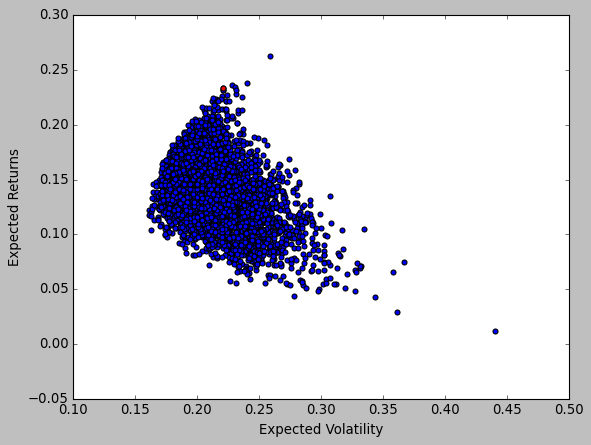

In [236]:
fig, ax = plt.subplots()
ax.scatter(Exp_volatility_portfolio, Exp_return_portfolio, c='b')
ax.scatter(Exp_volatility_portfolio[Sharpe_Ratios.argmax()], Exp_return_portfolio[Sharpe_Ratios.argmax()], c='r')
ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Returns')

After the Monte_Carlo simulation is run for 5000 times with 5000 different portfolios generated with Stocks of various weights, the results are plotted as a Scatter plot as shown above. 

The Scatter plot is plotted between the Expected Volatility of the portfolio in the X-Axis and Expected Returns of the portfolio in the Y-Axis. 

The red dot is said to be the best Portfolio and it was found by using the argmax() function. 

Now let us see the index position of the Best Portfolio

In [237]:
Sharpe_Ratios.argmax()

2936

Now since the index position of the Portfolio is known, let us whaqt are the weights of each selected Stock in that portfolio

In [239]:
weights[2936]

array([0.01130986, 0.10697115, 0.03521638, 0.32558456, 0.40419611,
       0.11672193])

1. Bausch HC - BHC - 1.1%
2. Johnson & Johnson - JNJ - 10.7%
3. Merck - MRK - 3.5%
4. Apple - 32.5%
5. Amazon - 40.4%
6. Google - 11.6%

In [242]:
Exp_return_portfolio.max()

0.26217704845916556

In [243]:
Sharpe_Ratios.max()

1.0591347456719244

The Expected Return of the Best Portfolio , i.e the Maximum Returns that can be achived is a massive **26%**

The Sharpe Ratio of the Best Portfolio, i.e the Highest Sharpe Ratio is **105%** 